# PyTorch Projects Part 1

This notebook contains first part of the projects I made recently in PyTorch while learning more about it in a Coursera Specializations. It is a mixture of course projects and personal projects where I used data from Kaggle and other sources. Since there are a lot of projects completed during this, I have broken it down into 2 parts. First part will deal with following Projects: 

1. Car Dataset Regression - Linear Layer based DNN
2. Iris Classification - Linear Layer based DNN
3. Concrete Crack Detector - CNN Classifier
4. Dog Breed Classifier - CNN Classifier
5. Heart Beat Sounds Anomaly Detection - Audio Classification using Spectrograms and CNN: 
6. Fruit Detection - Object Detection  
7. Face Mask Detection - YoloV8 Object Detection
8. Pet Classification - DenseNet Classifier
9. Style Transfer - CNN Style Transfer
10. Flight Passenger Modeling - LSTM based Time Series Modeling

Data has been sourced from libraries, kaggle dataset, other public datasets, and internet scraping. Among 11 projects/assignments above we have four personal projects:

1. Concrete Crack Detector: https://www.kaggle.com/datasets/arnavr10880/concrete-crack-images-for-classification
2. Heart Beat Sounds Anomaly Detection: https://www.kaggle.com/datasets/kinguistics/heartbeat-sounds/discussion?sort=undefined
3. Face Mask Detection: https://www.kaggle.com/datasets/andrewmvd/face-mask-detection
4. Dog Breed Classifier: images sourced from web



## Pytorch Basics

Some pytorch basics from the course

tensor(15.5000)
False
True
tensor(-8., grad_fn=<MulBackward0>)
tensor(31.)
tensor(15.)
tensor(44.)
tensor(-6.)


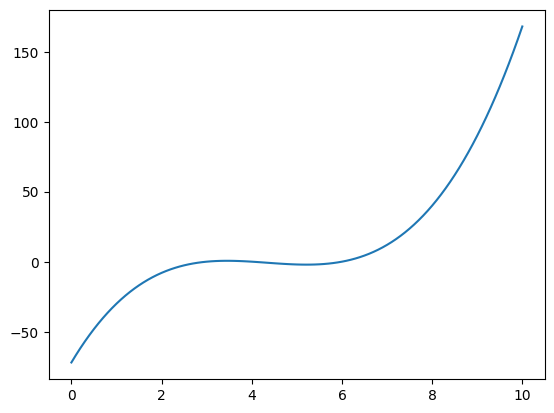

In [1]:
#%% packages
import torch
import seaborn as sns
import numpy as np

#%% create a tensor
x = torch.tensor(5.5)

# %% simple calculations
y = x + 10
print(y)

# %% automatic gradient calculation
print(x.requires_grad)  # check if requires_grad is true, false if not directly specified

x.requires_grad_() # set requires grad to true, default True

#%% or set the flag directly during creation
x = torch.tensor(2.0, requires_grad=True)
print(x.requires_grad)
#%% function for showing automatic gradient calculation
def y_function(val):
    return (val-3) * (val-6) * (val-4)

x_range = np.linspace(0, 10, 101)
x_range
y_range = [y_function(i) for i in x_range]
sns.lineplot(x = x_range, y = y_range)

# %% define y as function of x
y = (x-3) * (x-6) * (x-4)
print(y)
# %%

# %% x -> y
# create a tensor with gradients enabled
x = torch.tensor(1.0, requires_grad=True)
# create second tensor depending on first tensor
y = (x-3) * (x-6) * (x-4)
# calculate gradients
y.backward()
# show gradient of first tensor
print(x.grad)
# %% x -> y -> z
x = torch.tensor(1.0, requires_grad=True)
y = x**3
z = 5*y - 4

# %%
z.backward()
print(x.grad)  # should be equal 5*3x**2
# %% more complex network
x11 = torch.tensor(2.0, requires_grad=True)
x21 = torch.tensor(3.0, requires_grad=True)
x12 = 5 * x11 - 3 * x21
x22 = 2 * x11**2 + 2 * x21
y = 4 * x12 + 3 * x22
y.backward()
print(x11.grad)
print(x21.grad)
# %%


In [18]:
i1 = torch.tensor([1.0, 2.0, 4.5])
y1 = i1*x1

In [38]:
x1 = torch.tensor([45.0], requires_grad = True)
x2 = torch.tensor([10.4], requires_grad = True)
x3 = torch.tensor([5.1], requires_grad = True)

In [39]:
y1 = x1**2*5+ x1*4
y2 = y1 + x2**4
y3 = y2 + x3**2 + 5

In [41]:
y3.backward()

In [44]:
x1.grad

tensor([454.])

In [49]:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [43]:
x2.grad

tensor([4499.4556])

In [42]:
x3.grad

tensor([10.2000])

## Car Regression

tensor(140.4545, dtype=torch.float64)
tensor(74.7404, dtype=torch.float64)
tensor(51.5107, dtype=torch.float64)
tensor(42.1825, dtype=torch.float64)
tensor(38.0431, dtype=torch.float64)
tensor(36.0215, dtype=torch.float64)
tensor(34.9098, dtype=torch.float64)
tensor(34.2004, dtype=torch.float64)
tensor(33.6722, dtype=torch.float64)
tensor(33.2273, dtype=torch.float64)
tensor(32.8219, dtype=torch.float64)
tensor(32.4365, dtype=torch.float64)
tensor(32.0622, dtype=torch.float64)
tensor(31.6950, dtype=torch.float64)
tensor(31.3331, dtype=torch.float64)
tensor(30.9757, dtype=torch.float64)
tensor(30.6224, dtype=torch.float64)
tensor(30.2729, dtype=torch.float64)
tensor(29.9271, dtype=torch.float64)
tensor(29.5851, dtype=torch.float64)
tensor(29.2467, dtype=torch.float64)
tensor(28.9119, dtype=torch.float64)
tensor(28.5807, dtype=torch.float64)
tensor(28.2529, dtype=torch.float64)
tensor(27.9287, dtype=torch.float64)
tensor(27.6079, dtype=torch.float64)
tensor(27.2905, dtype=torch.float64)


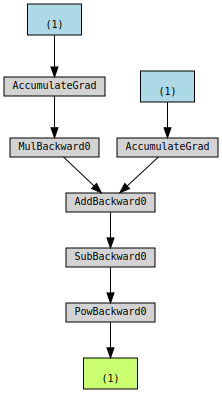

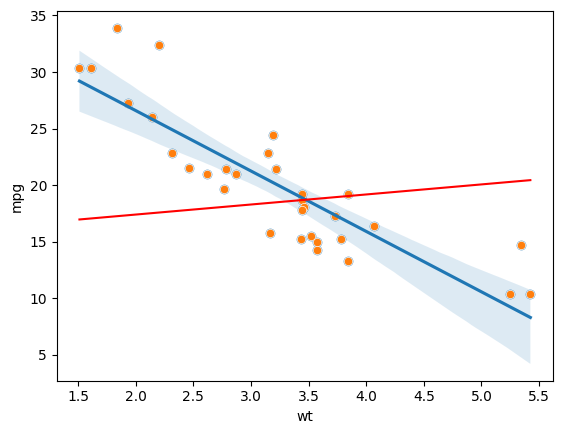

In [53]:
#%% packages
import numpy as np
import pandas as pd
import torch
import torch.nn as nn 
import seaborn as sns

#%% data import
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

#%% visualise the model
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

#%% convert data to tensor
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values.tolist()
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y = torch.tensor(y_list)


#%% training
w = torch.rand(1, requires_grad=True, dtype=torch.float64)
b = torch.rand(1, requires_grad=True, dtype=torch.float64)

num_epochs = 100
learning_rate = 1e-3
for epoch in range(num_epochs):
  for i in range(len(X)):
    # x, y = torch.tensor(X_list[i]), torch.tensor(y_list[i])
    # forward pass
    y_predict = X[i] * w + b
    # calculate loss
    loss_tensor = torch.pow(y_predict - y[i], 2)
    # backward pass
    loss_tensor.backward()
    # extract losses
    loss_value = loss_tensor.data[0]
    # update weights and biases
    with torch.no_grad():
      w -= w.grad * learning_rate
      b -= b.grad * learning_rate
      w.grad.zero_()
      b.grad.zero_()
  print(loss_value)

#%% check results
print(f"Weight: {w.item()}, Bias: {b.item()}")
# %%
y_pred = (torch.tensor(X_list)*w+b).detach().numpy()
# %%
sns.scatterplot(x=X_list, y=y_list)
sns.lineplot(x=X_list, y=y_pred, color='red')
# %% (Statistical) Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_np, y_list)
print(f"Slope: {reg.coef_}, Bias: {reg.intercept_}")


# %% create graph visualisation
# make sure GraphViz is installed (https://graphviz.org/download/)
# if not computer restarted, append directly to PATH variable
import os
from torchviz import make_dot
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin'
make_dot(loss_tensor)
# %%


Epoch 0, Loss: 438.2435607910156
Epoch 100, Loss: 68.23453521728516
Epoch 200, Loss: 41.07970428466797
Epoch 300, Loss: 26.310192108154297
Epoch 400, Loss: 18.277069091796875
Epoch 500, Loss: 13.90786075592041
Epoch 600, Loss: 11.53144359588623
Epoch 700, Loss: 10.238914489746094
Epoch 800, Loss: 9.535898208618164
Epoch 900, Loss: 9.153533935546875


<Axes: xlabel='wt', ylabel='mpg'>

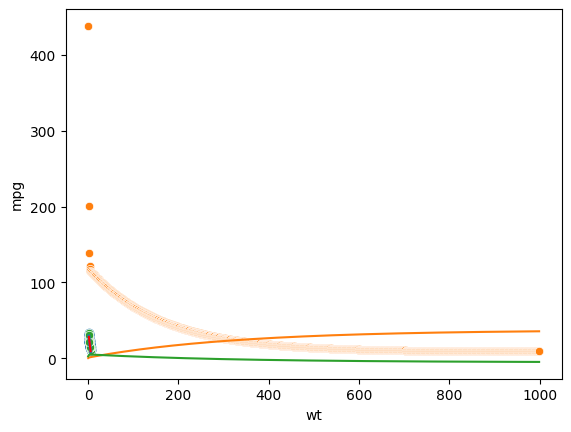

In [55]:
#%% packages
import numpy as np
import pandas as pd
import torch
import torch.nn as nn 
import seaborn as sns

#%% data import
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

#%% visualise the model
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

#%% convert data to tensor
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y_true = torch.from_numpy(y_np)

#%%
class LinearRegressionTorch(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.linear(x)

input_dim = 1
output_dim = 1
model = LinearRegressionTorch(input_size=input_dim, output_size=output_dim)


# %% Mean Squared Error
loss_fun = nn.MSELoss()

#%% Optimizer
LR = 0.02
# test different values of too large 0.1 and too small 0.001
# best 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

#%% perform training
losses, slope, bias = [], [], []
NUM_EPOCHS = 1000
for epoch in range(NUM_EPOCHS):
    
    # set gradients to zero
    optimizer.zero_grad()

    # forward pass
    y_pred = model(X)

    # calculate loss
    loss = loss_fun(y_pred, y_true)
    loss.backward()

    # update parameters
    optimizer.step()

    # get parameters
    for name, param in model.named_parameters():
        if param.requires_grad:
            if name == 'linear.weight':
                slope.append(param.data.numpy()[0][0])
            if name == 'linear.bias':
                bias.append(param.data.numpy()[0])


    # store loss
    losses.append(float(loss.data))
    # print loss
    if (epoch % 100 == 0):
        print(f"Epoch {epoch}, Loss: {loss.data}")

# %% visualise model training
sns.scatterplot(x=range(NUM_EPOCHS), y=losses)

#%% visualise the bias development
sns.lineplot(x=range(NUM_EPOCHS), y=bias)
#%% visualise the slope development
sns.lineplot(x=range(NUM_EPOCHS), y=slope)

# %% check the result
y_pred = model(X).data.numpy().reshape(-1)
sns.scatterplot(x=X_list, y=y_list)
sns.lineplot(x=X_list, y=y_pred, color='red')
# %%


In [59]:
model.eval()

LinearRegressionTorch(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

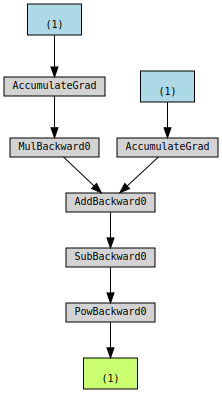

In [54]:
make_dot(loss_tensor)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .............................lr=0.02, max_epochs=10; total time=   0.1s
[CV] END .............................lr=0.02, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.02, max_epochs=10; total time=   0.0s
[CV] END ............................lr=0.02, max_epochs=200; total time=   0.2s
[CV] END ............................lr=0.02, max_epochs=200; total time=   0.2s
[CV] END ............................lr=0.02, max_epochs=200; total time=   0.2s
[CV] END ............................lr=0.02, max_epochs=500; total time=   0.5s
[CV] END ............................lr=0.02, max_epochs=500; total time=   0.5s
[CV] END ............................lr=0.02, max_epochs=500; total time=   0.4s
[CV] END .............................lr=0.05, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.05, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.05, ma

/home/anubh/miniconda3/envs/dl-env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1292: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)
/home/anubh/miniconda3/envs/dl-env/lib/python3.12/site-packages/sklearn/model_selection/_search.py:1135: UserWarning: One or more of the test scores are non-finite: [-2.79359118e+00 -4.60088611e-01  3.69245509e-01 -2.38198098e+00
  3.61617307e-01  5.86970448e-01 -8.31822226e+01 -3.61101433e+19
            -inf]
  warnings.warn(
/home/anubh/miniconda3/envs/dl-env/lib/python3.12/site-packages/sklearn/model_selection/_search.py:1146: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


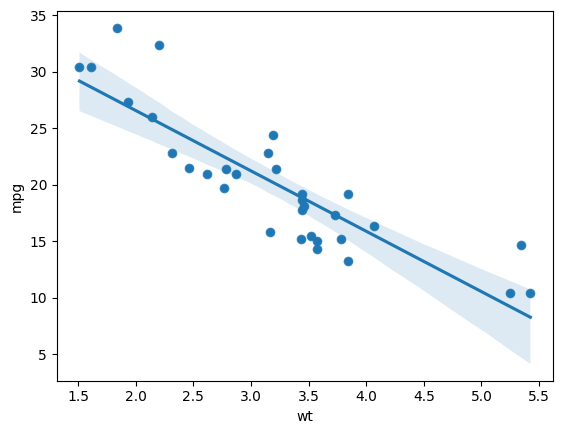

In [2]:
#%% packages
import numpy as np
import pandas as pd
import torchz
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader 
import seaborn as sns
from skorch import NeuralNetRegressor
from sklearn.model_selection import GridSearchCV
#%% data import
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

#%% visualise the model
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

#%% convert data to tensor
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y_true = torch.from_numpy(y_np)

#%% Dataset and Dataloader
class LinearRegressionDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(dataset = LinearRegressionDataset(X_np, y_np), batch_size=2)


#%%
class LinearRegressionTorch(nn.Module):
    def __init__(self, input_size=1, output_size=1):
        super(LinearRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.linear(x)

input_dim = 1
output_dim = 1
model = LinearRegressionTorch(input_size=input_dim, output_size=output_dim)
model.train()

# %% Mean Squared Error
loss_fun = nn.MSELoss()

#%% Optimizer
learning_rate = 0.02
# test different values of too large 0.1 and too small 0.001
# best 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


#%%
net = NeuralNetRegressor(
    LinearRegressionTorch,
    max_epochs=10,
    lr=0.1,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)
net.set_params(train_split=False, verbose=0)
params = {
    'lr': [0.02, 0.05, 0.08],
    'max_epochs': [10, 200, 500],
}
gs = GridSearchCV(net, params, refit=False, cv=3, scoring='r2', verbose=2)

gs.fit(X, y_true)
print(f"best score: {gs.best_score_:.3f}, best params: {gs.best_params_}")


# %%


## Iris Classifier

Basic Iris classifier excercise with multi-label classifier.

In [104]:
#%% packages
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
# %% data import
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
import matplotlib.pyplot as plt

In [108]:
# %% train test split
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size= 0.8, random_state= 10)

# %% convert to float32
x_train = torch.from_numpy(x_train).to(torch.float32)
x_test = torch.from_numpy(x_test).to(torch.float32)

y_train = torch.from_numpy(y_train).to(torch.float32)
y_test = torch.from_numpy(y_test).to(torch.float32)

# %% dataset

class IrisData(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]


# %% dataloader
iris_data = IrisData(x_train, y_train)
iris_batch = DataLoader(dataset= iris_data, shuffle= True, batch_size= 8)

# %% define class

class IrisClassifier(nn.Module):
    def __init__(self, num_features = 4, num_classes = 3):
        super().__init__()
        self.linear_1 = nn.Linear(num_features, 16)
        self.linear_2 = nn.Linear(16, 32)
        self.linear_3 = nn.Linear(32, 64)
        self.head = nn.Linear(64, num_classes)

    def forward(self, inputs):
        x = self.linear_1(inputs)
        x = torch.relu(x)
        x = self.linear_2(x)
        x = torch.relu(x)
        x = self.linear_3(x)
        return self.head(x)



In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [109]:
model = IrisClassifier(num_features= 4, num_classes=3).to(device)
optimizer_adam = torch.optim.Adam(model.parameters(), lr = 0.001)
loss_ce = nn.CrossEntropyLoss()

model.train()
for epoch in range(100):
    running_loss = 0.0
    for xb, yb in iris_batch:
        xb = xb.to(device)
        yb = yb.to(device).long()

        optimizer_adam.zero_grad()
        logits = model(xb)
        loss = loss_ce(logits, yb)

        loss.backward()
        optimizer_adam.step()

        running_loss = running_loss + loss.item()*8

    epoch_loss = running_loss/x_train.shape[0]
    print(f"Epoch {epoch+1:3d} | loss {epoch_loss:.4f}")

Epoch   1 | loss 1.0732
Epoch   2 | loss 0.9421
Epoch   3 | loss 0.7970
Epoch   4 | loss 0.6325
Epoch   5 | loss 0.5009
Epoch   6 | loss 0.4093
Epoch   7 | loss 0.3418
Epoch   8 | loss 0.2911
Epoch   9 | loss 0.2406
Epoch  10 | loss 0.2013
Epoch  11 | loss 0.1651
Epoch  12 | loss 0.1441
Epoch  13 | loss 0.1357
Epoch  14 | loss 0.1149
Epoch  15 | loss 0.1221
Epoch  16 | loss 0.1103
Epoch  17 | loss 0.1082
Epoch  18 | loss 0.0998
Epoch  19 | loss 0.0968
Epoch  20 | loss 0.0889
Epoch  21 | loss 0.0881
Epoch  22 | loss 0.0906
Epoch  23 | loss 0.1151
Epoch  24 | loss 0.1044
Epoch  25 | loss 0.0944
Epoch  26 | loss 0.1084
Epoch  27 | loss 0.0771
Epoch  28 | loss 0.0742
Epoch  29 | loss 0.0914
Epoch  30 | loss 0.0823
Epoch  31 | loss 0.0862
Epoch  32 | loss 0.0982
Epoch  33 | loss 0.0838
Epoch  34 | loss 0.0943
Epoch  35 | loss 0.0873
Epoch  36 | loss 0.0952
Epoch  37 | loss 0.0849
Epoch  38 | loss 0.1137
Epoch  39 | loss 0.0862
Epoch  40 | loss 0.0764
Epoch  41 | loss 0.0714
Epoch  42 | loss

In [110]:
model.eval()

with torch.no_grad():
    logits = model(x_test.to(device))
    probs = torch.softmax(logits, dim = 1)
    preds = probs.argmax(dim = 1)
    acc = (preds.cpu() == y_test).float().mean().data

print(f"Accuracy: {acc:.3f}")

Accuracy: 0.967


In [115]:
probs[0]

tensor([6.0130e-05, 9.9490e-01, 5.0355e-03], device='cuda:0')

X Shape: torch.Size([120, 4]), y shape: torch.Size([120])
Naive Classifier: 40.0 %


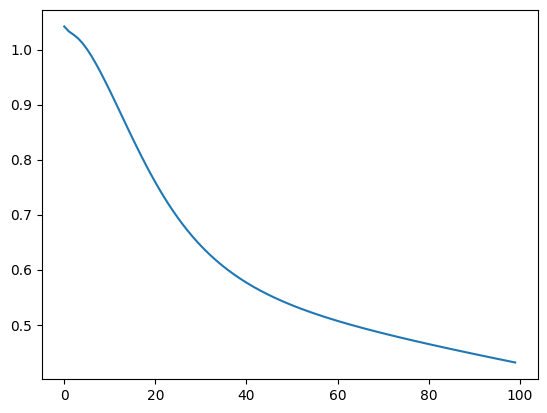

In [100]:
#now real answer:

#%% packages
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
# %% data import
iris = load_iris()
X = iris.data
y = iris.target

# %% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# %% convert to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# %% dataset
class IrisData(Dataset):
    def __init__(self, X_train, y_train) -> None:
        super().__init__()
        self.X = torch.from_numpy(X_train)
        self.y = torch.from_numpy(y_train)
        self.y = self.y.type(torch.LongTensor)
        self.len = self.X.shape[0]

    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def __len__(self):
        return self.len


# %% dataloader
iris_data = IrisData(X_train=X_train, y_train=y_train)
train_loader = DataLoader(dataset=iris_data, batch_size=32)
# %% check dims
print(f"X Shape: {iris_data.X.shape}, y shape: {iris_data.y.shape}")

# %% define class
class MultiClassNet(nn.Module):
    def __init__(self, NUM_FEATURES, NUM_CLASSES, HIDDEN_FEATURES):
        super().__init__()
        self.lin1 = nn.Linear(NUM_FEATURES, HIDDEN_FEATURES)
        self.lin2 = nn.Linear(HIDDEN_FEATURES, NUM_CLASSES)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.lin1(x)
        x = torch.sigmoid(x)
        x = self.lin2(x)
        x = self.log_softmax(x)
        return x

# %% hyper parameters
NUM_FEATURES = iris_data.X.shape[1]
HIDDEN = 6
NUM_CLASSES = len(iris_data.y.unique())
# %% create model instance
model = MultiClassNet(NUM_FEATURES=NUM_FEATURES, NUM_CLASSES=NUM_CLASSES, HIDDEN_FEATURES=HIDDEN)
# %% loss function
criterion = nn.CrossEntropyLoss()
# %% optimizer
lr = 0.1
optimizer=torch.optim.SGD(model.parameters(), lr=lr)
# %% training
NUM_EPOCHS = 100
losses = []
for epoch in range(NUM_EPOCHS):
    for x, y in train_loader:
      
        # initialize gradients
        optimizer.zero_grad()

        # forward pass
        y_hat_log = model(x)
        
        # calculate losses
        loss = criterion(y_hat_log, y)
        
        # calculate gradients
        
        loss.backward()
        # update parameters 
        optimizer.step()
        
    losses.append(float(loss.data.detach().numpy()))
        
# %% show losses over epochs

sns.lineplot(x= range(len(losses)), y = losses)
# %% test the model
X_test_torch = torch.from_numpy(X_test)
with torch.no_grad():
    y_test_hat_softmax = model(X_test_torch)
    y_test_hat = torch.max(y_test_hat_softmax.data, 1)


# %% Accuracy
accuracy_score(y_test, y_test_hat.indices)
# %%
from collections import Counter
most_common_cnt = Counter(y_test).most_common()[0][1]
print(f"Naive Classifier: {most_common_cnt / len(y_test) * 100} %")
# %% save model state dict
torch.save(model.state_dict(), 'model_iris.pt')
# %%


In [2]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Reproducibility
torch.manual_seed(0)
np.random.seed(0)

# %% data: Iris (120 train, 30 test typically with test_size=0.2)
iris = load_iris()
X = iris.data.astype(np.float32)           # (150, 4)
y = iris.target.astype(np.int64)           # (150,) integers in {0,1,2}

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# %% tensors + dataset/dataloader
X_train_t = torch.from_numpy(X_train)      # float32
y_train_t = torch.from_numpy(y_train)      # int64 (long)

X_test_t = torch.from_numpy(X_test)
y_test_t = torch.from_numpy(y_test)

train_ds = TensorDataset(X_train_t, y_train_t)
train_dl = DataLoader(train_ds, batch_size=16, shuffle=True)

# %% model: logits (no softmax inside when using CrossEntropyLoss)
class IrisClassifier(nn.Module):
    def __init__(self, in_features=4, num_classes=3):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_features, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes)   # logits (N, 3)
        )
    def forward(self, x):
        return self.net(x)

# %% device, model, loss, optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = IrisClassifier(in_features=4, num_classes=3).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# %% training loop (batched)
epochs = 50
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    n_seen = 0

    for xb, yb in train_dl:
        xb = xb.to(device)            # (B, 4) float32
        yb = yb.to(device).long()     # (B,) int64 class ids

        optimizer.zero_grad()
        logits = model(xb)            # (B, 3)
        loss = criterion(logits, yb)  # CE expects logits + long targets
        loss.backward()
        optimizer.step()

        batch_size = xb.size(0)
        running_loss += loss.item() * batch_size
        n_seen += batch_size

    epoch_loss = running_loss / n_seen
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1:02d} | loss {epoch_loss:.4f}")

# %% evaluation
model.eval()
with torch.no_grad():
    logits_test = model(X_test_t.to(device))     # (N_test, 3)
    preds = logits_test.argmax(dim=1).cpu().numpy()
    acc = accuracy_score(y_test, preds)
    # optional probabilities
    probs = torch.softmax(logits_test, dim=1).cpu().numpy()

print(f"Test accuracy: {acc:.3f}")

# %% save weights
torch.save(model.state_dict(), "iris_multiclass.pt")

Epoch 10 | loss 0.7285
Epoch 20 | loss 0.5301
Epoch 30 | loss 0.4320
Epoch 40 | loss 0.3646
Epoch 50 | loss 0.3140
Test accuracy: 0.967


In [19]:
#%% packages
from ast import Mult
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader 
import seaborn as sns
import numpy as np
from collections import Counter
# %% data prep
X, y = make_multilabel_classification(n_samples=10000, n_features=10, n_classes=3, n_labels=2)
X_torch = torch.FloatTensor(X)
y_torch = torch.FloatTensor(y)

# %% train test split
X_train, X_test, y_train, y_test = train_test_split(X_torch, y_torch, test_size = 0.2)


# %% dataset and dataloader
class MultilabelDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_sim = MultilabelDataset(X_train, y_train)
train_batch = DataLoader(train_sim, shuffle = True, batch_size= 128)

In [21]:
for x,y in train_batch:
    print(x.size(0))

128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
64


device(type='cuda')

In [40]:
device = torch.device("cuda")

class MultiLabelClassifier(nn.Module):
    def __init__(self, num_features = 10, num_labels = 3):
        super().__init__()
        self.linear_1 = nn.Linear(num_features, 32)
        self.linear_2 = nn.Linear(32, 64)
        self.linear_3 = nn.Linear(64, 32)
        self.out = nn.Linear(32, num_labels)

    def forward(self, inputs):
        x = self.linear_1(inputs)
        x = torch.relu(x)
        x = self.linear_2(x)
        x = torch.relu(x)
        x = self.linear_3(x)
        x = self.out(x)
        return x

model = MultiLabelClassifier(num_features= 10, num_labels=3).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
loss = nn.BCEWithLogitsLoss()

for epoch in range(100):
    running_loss = 0
    for xb, yb in train_batch:
        optimizer.zero_grad()

        xb = xb.to(device)
        yb = yb.to(device)

        logits = model(xb)
        loss_batch = loss(logits, yb) 
        loss_batch.backward()

        optimizer.step()

        running_loss += loss_batch.item()*xb.size(0)
    if (epoch+1)%10 == 0:
        print(f'Epoch {epoch+1} Loss: {running_loss/10000}')
        

Epoch 10 Loss: 0.2619664903640747
Epoch 20 Loss: 0.2556064300537109
Epoch 30 Loss: 0.25261762924194336
Epoch 40 Loss: 0.25195099811553956
Epoch 50 Loss: 0.24895018978118896
Epoch 60 Loss: 0.2466940806388855
Epoch 70 Loss: 0.24643583011627196
Epoch 80 Loss: 0.24291209392547608
Epoch 90 Loss: 0.2420872827529907
Epoch 100 Loss: 0.24140781593322755


In [37]:
model.eval()
with torch.no_grad():
    logits = model(X_test.to(device))
    probs = torch.sigmoid(logits)                
    preds = (probs > 0.5).float()                

In [50]:
#per label accuracy 
preds.cpu().eq(y_test).float().mean().item()

0.8475000262260437

In [59]:
Counter([str(i) for i in y_test.detach()]).most_common()[0]

('tensor([0., 1., 1.])', 457)

In [68]:

#%% Naive classifier accuracy
# convert [1, 1, 0] to string '[1. 1. 0.]'
y_test_str = [str(i) for i in y_test.detach().numpy()]
y_test_str

most_common_cnt = Counter(y_test_str).most_common()[0][1]
print(f"Naive classifier: {most_common_cnt/len(y_test_str) * 100}%")

# %% Test accuracy
test_acc = accuracy_score(y_test, preds.cpu())
print(f"Test accuracy: {test_acc * 100}%")

Naive classifier: 22.85%
Test accuracy: 66.55%


In [67]:
preds

tensor([[1., 1., 0.],
        [1., 1., 1.],
        [0., 1., 1.],
        ...,
        [0., 1., 0.],
        [1., 0., 1.],
        [0., 0., 0.]], device='cuda:0')

Epoch 0, Loss: 0.7124454379081726
Epoch 10, Loss: 0.6857510209083557
Epoch 20, Loss: 0.6934431791305542
Epoch 30, Loss: 0.6994408369064331
Epoch 40, Loss: 0.6819613575935364
Epoch 50, Loss: 0.6723743677139282
Epoch 60, Loss: 0.7254282832145691
Epoch 70, Loss: 0.7391589879989624
Epoch 80, Loss: 0.7065574526786804
Epoch 90, Loss: 0.6998968720436096
Naive classifier: 21.85%
Test accuracy: 55.2%


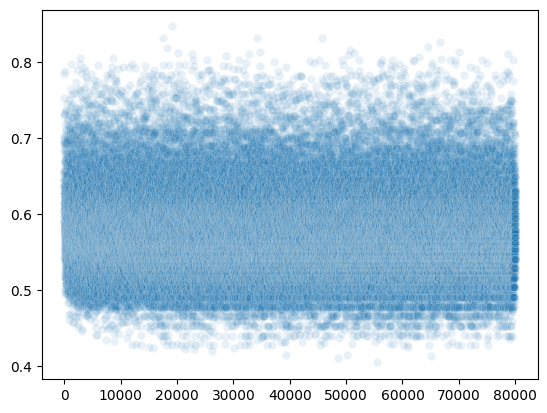

In [70]:
#answer from course
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader 
import seaborn as sns
import numpy as np
from collections import Counter
# %% data prep
X, y = make_multilabel_classification(n_samples=10000, n_features=10, n_classes=3, n_labels=2)
X_torch = torch.FloatTensor(X)
y_torch = torch.FloatTensor(y)

# %% train test split
X_train, X_test, y_train, y_test = train_test_split(X_torch, y_torch, test_size = 0.2)


# %% dataset and dataloader
class MultilabelDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

multilabel_data = MultilabelDataset(X_train, y_train)
train_loader = DataLoader(dataset = multilabel_data, batch_size=10)


# %% model
# topology: fc1, relu, fc2
# final activation function??
class MultilabelNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MultilabelNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

input_dim = X_torch.shape[1]
output_dim = y_torch.shape[1]
model = MultilabelNetwork(input_size=input_dim, hidden_size=20, output_size=output_dim)
model.train()
# %%
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
losses = []
slope, bias = [], []
number_epochs = 100
for epoch in range(number_epochs):
    for j, data in enumerate(train_loader):
        
        # optimization
        optimizer.zero_grad()

        # forward pass
        y_hat = model(data[0])

        # compute loss
        loss = loss_fn(y_hat, data[1])
        losses.append(loss.item())

        # backprop
        loss.backward()

        # update weights
        optimizer.step()
    
    if (epoch % 10 == 0):
        print(f"Epoch {epoch}, Loss: {loss.data}")

# %% losses
sns.scatterplot(x=range(len(losses)), y=losses, alpha=0.1)

# %% test the model
X_test_torch = torch.FloatTensor(X_test)
with torch.no_grad():
    y_test_hat = model(X_test_torch).round()
    

#%% Naive classifier accuracy
# convert [1, 1, 0] to string '[1. 1. 0.]'
y_test_str = [str(i) for i in y_test.detach().numpy()]
y_test_str

most_common_cnt = Counter(y_test_str).most_common()[0][1]
print(f"Naive classifier: {most_common_cnt/len(y_test_str) * 100}%")

# %% Test accuracy
test_acc = accuracy_score(y_test, y_test_hat)
print(f"Test accuracy: {test_acc * 100}%")



## Basic CNN

Torchvision based CNN architect on an image.

In [12]:
#%%
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
# %% import image
img = Image.open('kiki.jpg')
img

# %% compose a series of steps
preprocess_steps = transforms.Compose([
    transforms.Resize(300), 
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.1),
    transforms.RandomRotation(
        15,
        interpolation=transforms.InterpolationMode.BILINEAR,
        fill=(128, 128, 128)                  # avoid black corners
    ),
    transforms.CenterCrop(250),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),
                         (0.229, 0.224, 0.225)),  # ImageNet stats
])

x = preprocess_steps(img)
x

# %% get the mean and std of given image
x.mean([1, 2]), x.std([1, 2])

(tensor([-0.2861, -0.1897, -0.1299]), tensor([1.3243, 1.2988, 1.1860]))

In [5]:
cd BinaryClassification/

/mnt/c/Users/anubh/pytorch coursera/060_CNN_ImageClassification/BinaryClassification


In [2]:
cd ..

/mnt/c/Users/anubh/pytorch coursera


## Concrete Crack Detection

First personal project in the notebook. Here we will make a CNN based model for crack detection on a kaggle dataset and perform gradcam evaluation too.

In [17]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader
from torchsummary import summary
import torch.nn.functional as F

In [7]:
transform_net = transforms.Compose(
    [transforms.Resize((164, 164)),
     transforms.Grayscale(num_output_channels= 1),
     transforms.ToTensor(),
     transforms.Normalize(mean = (0.5), std = (0.5))]
)

train_data = torchvision.datasets.ImageFolder('data/train/', transform= transform_net)
train_loader = DataLoader(train_data, shuffle= True, batch_size= 64)

test_data = torchvision.datasets.ImageFolder('data/test//', transform= transform_net)
test_loader = DataLoader(test_data, batch_size= 64)

In [5]:
cd 060_CNN_ImageClassification/BinaryClassification/

/mnt/c/Users/anubh/pytorch coursera/060_CNN_ImageClassification/BinaryClassification


In [8]:
def block_CNN(inputs, input_channels = 3, out_channels = 64):
    x = nn.Conv2d(input_channels, out_channels, kernel_size = 3, padding = 1, stride = 1)(inputs)
    x = nn.Conv2d(out_channels, out_channels, kernel_size = 3, padding = 1, stride = 1)(x)
    x = nn.BatchNorm2d(out_channels)(x)
    x = nn.ReLU6()(x)
    x = nn.MaxPool2d(kernel_size = 2,stride = 2)(x)
    return x

In [13]:
class CrackClassifier(nn.Module):
    def __init__(self, num_classes=2):
        super().__init__()
        # Block 1: 1 -> 64, then pool (164 -> 82)
        self.block1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1, stride=1),
            nn.Conv2d(64, 64, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(64),
            nn.ReLU6(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        # Block 2: 64 -> 128, pool (82 -> 41)
        self.block2 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU6(inplace=True),
            nn.MaxPool2d(2, 2),
        )
        # Block 3: 128 -> 256, pool (41 -> 20)
        self.block3 = nn.Sequential(
            nn.Conv2d(128, 256, 3, padding=1),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU6(inplace=True),
            nn.MaxPool2d(2, 2),
        )
        # Block 4: 256 -> 256, pool (20 -> 10)
        self.block4 = nn.Sequential(
            nn.Conv2d(256, 256, 3, padding=1),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU6(inplace=True),
            nn.MaxPool2d(2, 2),
        )

        # Head
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))   # -> (N, 256, 7, 7)
        self.flatten = nn.Flatten()                   # -> (N, 256*7*7)
        self.fc1     = nn.Linear(256 * 7 * 7, 1024)
        self.relu1   = nn.ReLU(inplace=True)
        self.drop1   = nn.Dropout(0.2)
        self.fc2     = nn.Linear(1024, 512)
        self.relu2   = nn.ReLU(inplace=True)
        self.drop2   = nn.Dropout(0.2)
        self.out     = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.block1(x)   # (N, 64, 82, 82)
        x = self.block2(x)   # (N, 128, 41, 41)
        x = self.block3(x)   # (N, 256, 20, 20)
        x = self.block4(x)   # (N, 256, 10, 10)
        x = self.avgpool(x)  # (N, 256, 7, 7)
        x = self.flatten(x)  # (N, 12544)
        x = self.drop1(self.relu1(self.fc1(x)))
        x = self.drop2(self.relu2(self.fc2(x)))
        return self.out(x)   # logits


model = CrackClassifier(num_classes=2).to(torch.device('cuda'))
summary(model, input_size = (1, 164,164))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 164, 164]             640
            Conv2d-2         [-1, 64, 164, 164]          36,928
       BatchNorm2d-3         [-1, 64, 164, 164]             128
             ReLU6-4         [-1, 64, 164, 164]               0
         MaxPool2d-5           [-1, 64, 82, 82]               0
            Conv2d-6          [-1, 128, 82, 82]          73,856
            Conv2d-7          [-1, 128, 82, 82]         147,584
       BatchNorm2d-8          [-1, 128, 82, 82]             256
             ReLU6-9          [-1, 128, 82, 82]               0
        MaxPool2d-10          [-1, 128, 41, 41]               0
           Conv2d-11          [-1, 256, 41, 41]         295,168
           Conv2d-12          [-1, 256, 41, 41]         590,080
      BatchNorm2d-13          [-1, 256, 41, 41]             512
            ReLU6-14          [-1, 256,

In [10]:
device = torch.device('cuda')

In [14]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
loss_fn = nn.CrossEntropyLoss()

model.train()
for epoch in range(15):
    correct = 0
    total = 0
    running_loss = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        xb = xb.to(device) 
        yb = yb.to(device).long()

        logits = model(xb) 
        loss = loss_fn(logits, yb) 
        loss.backward() 

        optimizer.step()
        running_loss = running_loss + loss.item()*xb.size(0)

        preds = logits.argmax(dim=1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    print(f"Epoch {epoch+1:03d} | loss: {epoch_loss:.4f} | acc: {epoch_acc:.4f}")

Epoch 001 | loss: 1.6142 | acc: 0.7530
Epoch 002 | loss: 0.1222 | acc: 0.9610
Epoch 003 | loss: 0.0401 | acc: 0.9900
Epoch 004 | loss: 0.0668 | acc: 0.9870
Epoch 005 | loss: 0.0592 | acc: 0.9860
Epoch 006 | loss: 0.0319 | acc: 0.9910
Epoch 007 | loss: 0.0433 | acc: 0.9840
Epoch 008 | loss: 0.0251 | acc: 0.9920
Epoch 009 | loss: 0.0234 | acc: 0.9910
Epoch 010 | loss: 0.0200 | acc: 0.9930
Epoch 011 | loss: 0.0182 | acc: 0.9930
Epoch 012 | loss: 0.0425 | acc: 0.9860
Epoch 013 | loss: 0.0300 | acc: 0.9920
Epoch 014 | loss: 0.0434 | acc: 0.9890
Epoch 015 | loss: 0.0294 | acc: 0.9860


In [15]:
@torch.no_grad()
def evaluate_test(model, test_loader):
    model.eval()
    total, correct = 0, 0
    loss_sum = 0.0
    for xb, yb in test_loader:
        xb = xb.to(device)
        yb = yb.to(device).long()
        logits = model(xb)                      # (B, C) logits
        loss = loss_fn(logits, yb)              # mean CE over batch
        loss_sum += loss.item() * xb.size(0)

        preds = logits.argmax(dim=1)            # top-1 predicted class
        correct += (preds == yb).sum().item()
        total += yb.size(0)

    test_loss = loss_sum / total
    test_acc  = correct / total
    return test_loss, test_acc

test_loss, test_acc = evaluate_test(model, test_loader)
print(f"Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")

Test loss: 0.0695 | Test accuracy: 0.9702


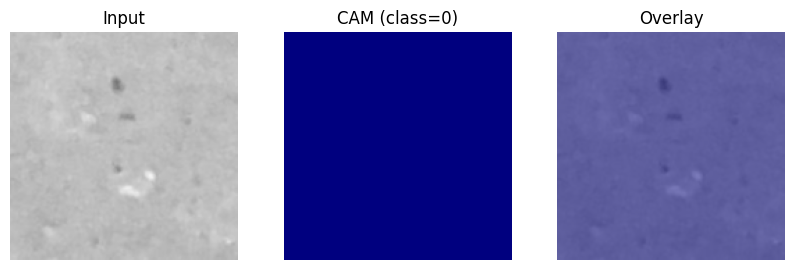

In [18]:
target_layer = model.block4[1]  # Conv2d(256, 256, ...)

acts = []
grads = []

def fwd_hook(module, inp, out):
    acts.append(out.detach())

def bwd_hook(module, grad_input, grad_output):
    # grad_output[0] is dY/dA (same shape as activations)
    grads.append(grad_output[0].detach())

h_fwd = target_layer.register_forward_hook(fwd_hook)
h_bwd = target_layer.register_full_backward_hook(bwd_hook)

xb, yb = next(iter(test_loader))
xb = xb.to(device)[:1]  # one image (1, 1, 164, 164)
yb = yb[:1]             # label (optional, for reference)

model.zero_grad()
logits = model(xb)               # (1, C)
pred_class = int(logits.argmax(dim=1).item())
score = logits[:, pred_class].sum()

score.backward()

A = acts.pop()         # (1, C, H', W'), here (1, 256, 10, 10)
G = grads.pop()        # same shape as A
weights = G.mean(dim=(2, 3), keepdim=True)  # (1, C, 1, 1)

cam = (weights * A).sum(dim=1, keepdim=True)  # (1, 1, H', W')
cam = F.relu(cam)                              # keep positive evidence
# Normalize CAM to [0, 1] per image
cam_min, cam_max = cam.min(), cam.max()
cam = (cam - cam_min) / (cam_max - cam_min + 1e-8)

H, W = xb.shape[-2:]
cam_up = F.interpolate(cam, size=(H, W), mode='bilinear', align_corners=False)  # [[1]]

x_vis = xb.detach().clone()
x_vis = x_vis * 0.5 + 0.5
x_vis = x_vis.clamp(0,1)

# Make 3-channel for plotting
x_rgb = x_vis.repeat(1, 3, 1, 1)[0].permute(1,2,0).cpu().numpy()    # (H, W, 3)
heat = cam_up[0, 0].cpu().numpy()                                   # (H, W)

# Colorize heatmap and overlay
import matplotlib.cm as cm
heat_rgb = cm.jet(heat)[:, :, :3]      # (H, W, 3) in [0,1]
overlay = (0.5 * x_rgb + 0.5 * heat_rgb)
overlay = np.clip(overlay, 0, 1)

plt.figure(figsize=(10,3))
plt.subplot(1,3,1); plt.title('Input'); plt.axis('off'); plt.imshow(x_rgb)
plt.subplot(1,3,2); plt.title(f'CAM (class={pred_class})'); plt.axis('off'); plt.imshow(heat, cmap='jet')
plt.subplot(1,3,3); plt.title('Overlay'); plt.axis('off'); plt.imshow(overlay)
plt.show()

# 11) Clean up hooks (good hygiene)
h_fwd.remove(); h_bwd.remove()


In [20]:
import matplotlib.pyplot as plt

from pytorch_grad_cam import GradCAM                           # core class [[1]]
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image      # overlay helper [[1]]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device).eval()

last_img_tensor, last_label = test_loader.dataset[-1]  # transformed sample (C,H,W)
xb = last_img_tensor.unsqueeze(0).to(device)           # (1,C,H,W)

In [24]:
test_loader.dataset[-1]

(tensor([[[0.3333, 0.3569, 0.3490,  ..., 0.3176, 0.3333, 0.3176],
          [0.3490, 0.3412, 0.3255,  ..., 0.3255, 0.3412, 0.3255],
          [0.3412, 0.3176, 0.2863,  ..., 0.3255, 0.3255, 0.3176],
          ...,
          [0.3804, 0.3725, 0.3647,  ..., 0.4353, 0.4118, 0.3961],
          [0.3569, 0.3490, 0.3647,  ..., 0.4353, 0.3961, 0.3804],
          [0.3490, 0.3490, 0.3569,  ..., 0.4431, 0.4118, 0.3961]]]),
 1)

In [28]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device).eval()

last_img_tensor, last_label = test_loader.dataset[-1]  # transformed sample (C,H,W)
xb = last_img_tensor.unsqueeze(0).to(device)           # (1,C,H,W)

target_layers = [model.block4[1]]  # the second Conv2d in block4

# Pick the class to explain (predicted class here)
with torch.no_grad():
    logits = model(xb)
pred_class = int(logits.argmax(dim=1).item())

cam = GradCAM(model=model, target_layers=target_layers)  # [[1]]

# Compute the CAM (returns a (B,H,W) numpy array in [0,1])
grayscale_cam = cam(input_tensor=xb, targets=[ClassifierOutputTarget(pred_class)])  # [[1]]
cam_map = grayscale_cam[0]  # (H,W)

x_vis = xb[0].detach().cpu()         # (C,H,W)
# De-normalize grayscale: x = x*std + mean = x*0.5 + 0.5
x_vis = (x_vis * 0.5 + 0.5).clamp(0, 1)

# If grayscale (C=1), repeat to 3 channels for visualization
if x_vis.shape[0] == 1:
    x_rgb = x_vis.repeat(3, 1, 1)
else:
    x_rgb = x_vis

rgb_image = np.transpose(x_rgb.numpy(), (1, 2, 0))  # (H,W,3) in [0,1]


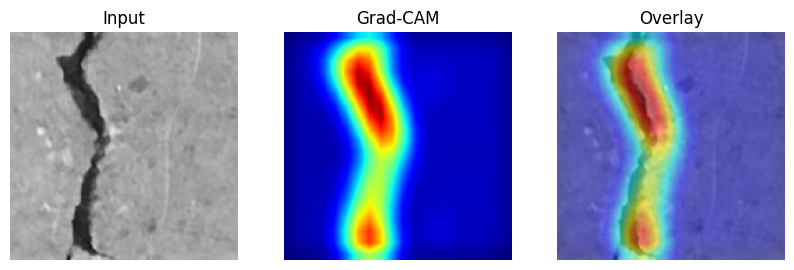

Predicted class: 1, True label: 1


In [31]:
overlay = show_cam_on_image(rgb_image, cam_map, use_rgb=True)  # [[1]]

plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.title('Input');    plt.axis('off'); plt.imshow(rgb_image)
plt.subplot(1,3,2); plt.title('Grad-CAM'); plt.axis('off'); plt.imshow(cam_map, cmap='jet')
plt.subplot(1,3,3); plt.title('Overlay');  plt.axis('off'); plt.imshow(overlay)
plt.show()

print(f"Predicted class: {pred_class}, True label: {int(last_label)}")

In [34]:
cam_map.max()

np.float32(0.9999999)

We obtained 97% test accuracy and as we can see here, model is correctly putting emphasis on the large cracks but it can be improved by fine tuning a larger pretrained model.

## Dog Breed Classification

Second personal project, it is based on data scraped from internet for multiple dog breeeds. Here we will create a Resnet-18 like CNN solution while also checking what model is focusing on largely by using gradcam.

In [37]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader
from torchsummary import summary


/mnt/c/Users/anubh/pytorch coursera/060_CNN_ImageClassification/MulticlassClassification


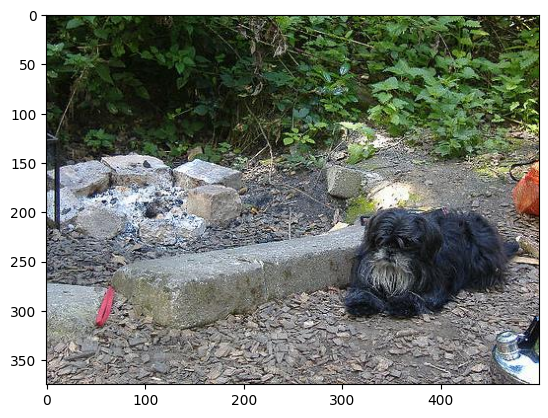

In [45]:
plt.imshow(plt.imread('train/affenpinscher/affenpinscher_5.jpg'))

In [79]:
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.2),
    transforms.RandAugment(num_ops= 2),
    transforms.ToTensor(),
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


train_data = torchvision.datasets.ImageFolder('train/', transform= transform_train)
train_loader = DataLoader(dataset = train_data, shuffle= True, batch_size= 64)

test_data = torchvision.datasets.ImageFolder('test/', transform = transform_test)
test_loader = DataLoader(dataset = test_data, batch_size= 64)

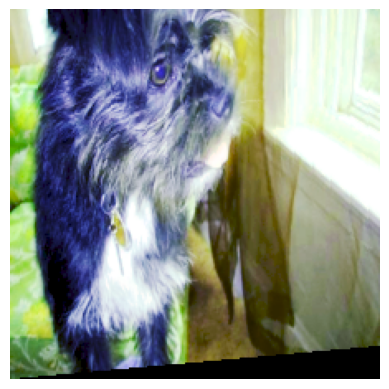

In [80]:
img_t, label = train_data[5]        # Tensor (C, H, W) in [0,1]
img = img_t.permute(1, 2, 0).numpy()  # -> (H, W, C)
plt.imshow(img)
plt.axis('off')
plt.show()

In [98]:
class BreedClassifier(nn.Module):
    def __init__(self, num_classes = 3):
        super().__init__()

        self.conv1_a = nn.Conv2d(in_channels= 3, out_channels= 64, kernel_size= 5, stride = 2, padding = 3, bias = False)
        self.conv1_b = nn.Conv2d(in_channels= 64, out_channels= 64, kernel_size= 5, stride = 2, padding = 3, bias = False)
        self.norm1 = nn.BatchNorm2d(num_features= 64)
        self.relu1 = nn.ReLU6()
        self.maxpool1 = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)

        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels= 64, out_channels= 64, kernel_size= 3, padding = 1, bias = False),
            nn.Conv2d(in_channels= 64, out_channels= 64, kernel_size= 3, padding = 1, bias = False),
            nn.BatchNorm2d(num_features= 64),
            nn.ReLU6(),

            nn.Conv2d(in_channels= 64, out_channels= 64, kernel_size= 3, padding = 1, bias = False),
            nn.Conv2d(in_channels= 64, out_channels= 64, kernel_size= 3, padding = 1, bias = False),
            nn.BatchNorm2d(num_features= 64),
        )

        self.relu2 = nn.ReLU6()
        self.maxpool2 = nn.MaxPool2d(kernel_size= 3, stride = 2, padding = 1)

        self.expansion1 = nn.Conv2d(64, 128, kernel_size=1)
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels= 64, out_channels= 128, kernel_size= 3, padding = 1, bias = False),
            nn.Conv2d(in_channels= 128, out_channels= 128, kernel_size= 3, padding = 1, bias = False),
            nn.BatchNorm2d(num_features= 128),
            nn.ReLU6(),

            nn.Conv2d(in_channels= 128, out_channels= 128, kernel_size= 3, padding = 1, bias = False),
            nn.Conv2d(in_channels= 128, out_channels= 128, kernel_size= 3, padding = 1, bias = False),
            nn.BatchNorm2d(num_features= 128),
            nn.ReLU6(),
        )

        self.relu3 = nn.ReLU6()
        self.maxpool3 = nn.MaxPool2d(kernel_size= 3, stride = 2, padding = 1)

        self.expansion2 = nn.Conv2d(128, 256, kernel_size=1)
        self.block3 = nn.Sequential(
            nn.Conv2d(in_channels= 128, out_channels= 256, kernel_size= 3, padding = 1, bias = False),
            nn.Conv2d(in_channels= 256, out_channels= 256, kernel_size= 3, padding = 1, bias = False),
            nn.BatchNorm2d(num_features= 256),
            nn.ReLU6(), 

            nn.Conv2d(in_channels= 256, out_channels= 256, kernel_size= 3, padding = 1, bias = False),
            nn.Conv2d(in_channels= 256, out_channels= 256, kernel_size= 3, padding = 1, bias = False),
            nn.BatchNorm2d(num_features= 256),
        )

        self.relu4 = nn.ReLU6()

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256, 1024)
        self.drop1 = nn.Dropout(0.2)
        self.relu5 = nn.ReLU6()
        self.fc2 = nn.Linear(1024, 512)
        self.drop2 = nn.Dropout(0.2)
        self.relu6 = nn.ReLU6()
        self.fc3 = nn.Linear(512, num_classes)

    def forward(self, inputs):

        x = self.conv1_a(inputs)
        x = self.conv1_b(x)
        x = self.norm1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        identity = x
        x = self.block1(x)
        x = x + identity
        x = self.relu2(x)
        x = self.maxpool2(x)

        identity = self.expansion1(x)
        x = self.block2(x)
        x = x + identity
        x = self.relu3(x)
        x = self.maxpool3(x)

        identity = self.expansion2(x)
        x = self.block3(x)
        x = x + identity
        x = self.relu4(x)
        
        x = self.avgpool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu5(x)
        x = self.drop1(x)
        
        x = self.fc2(x)
        x = self.relu6(x)
        x = self.drop2(x)
        x = self.fc3(x)

        return x

device = torch.device('cuda')
model = BreedClassifier(num_classes=3).to(device)
summary(model, input_size= (3, 224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 113, 113]           4,800
            Conv2d-2           [-1, 64, 58, 58]         102,400
       BatchNorm2d-3           [-1, 64, 58, 58]             128
             ReLU6-4           [-1, 64, 58, 58]               0
         MaxPool2d-5           [-1, 64, 29, 29]               0
            Conv2d-6           [-1, 64, 29, 29]          36,864
            Conv2d-7           [-1, 64, 29, 29]          36,864
       BatchNorm2d-8           [-1, 64, 29, 29]             128
             ReLU6-9           [-1, 64, 29, 29]               0
           Conv2d-10           [-1, 64, 29, 29]          36,864
           Conv2d-11           [-1, 64, 29, 29]          36,864
      BatchNorm2d-12           [-1, 64, 29, 29]             128
            ReLU6-13           [-1, 64, 29, 29]               0
        MaxPool2d-14           [-1, 64,

In [99]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)
loss_fn = nn.CrossEntropyLoss()

model.train()
for epoch in range(25):
    correct = 0
    total = 0
    running_loss = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        xb = xb.to(device) 
        yb = yb.to(device).long()

        logits = model(xb) 
        loss = loss_fn(logits, yb) 
        loss.backward() 

        optimizer.step()
        running_loss = running_loss + loss.item()*xb.size(0)

        preds = logits.argmax(dim=1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    print(f"Epoch {epoch+1:03d} | loss: {epoch_loss:.4f} | acc: {epoch_acc:.4f}")

Epoch 001 | loss: 1.0919 | acc: 0.3256
Epoch 002 | loss: 1.0378 | acc: 0.4718
Epoch 003 | loss: 0.9435 | acc: 0.5415
Epoch 004 | loss: 0.8265 | acc: 0.6213
Epoch 005 | loss: 0.7157 | acc: 0.7076
Epoch 006 | loss: 0.6449 | acc: 0.7209
Epoch 007 | loss: 0.5588 | acc: 0.7807
Epoch 008 | loss: 0.4475 | acc: 0.8173
Epoch 009 | loss: 0.3605 | acc: 0.8571
Epoch 010 | loss: 0.3652 | acc: 0.8571
Epoch 011 | loss: 0.3384 | acc: 0.8904
Epoch 012 | loss: 0.2880 | acc: 0.8771
Epoch 013 | loss: 0.3021 | acc: 0.8771
Epoch 014 | loss: 0.2097 | acc: 0.9136
Epoch 015 | loss: 0.2363 | acc: 0.9037
Epoch 016 | loss: 0.1905 | acc: 0.9203
Epoch 017 | loss: 0.2107 | acc: 0.9269
Epoch 018 | loss: 0.1706 | acc: 0.9302
Epoch 019 | loss: 0.1650 | acc: 0.9535
Epoch 020 | loss: 0.1097 | acc: 0.9535
Epoch 021 | loss: 0.1177 | acc: 0.9601
Epoch 022 | loss: 0.1493 | acc: 0.9402
Epoch 023 | loss: 0.0809 | acc: 0.9701
Epoch 024 | loss: 0.1581 | acc: 0.9435
Epoch 025 | loss: 0.0836 | acc: 0.9701


In [135]:
@torch.no_grad()
def evaluate_test(model, test_loader):
    model.eval()
    total, correct = 0, 0
    loss_sum = 0.0
    for xb, yb in test_loader:
        xb = xb.to(device)
        yb = yb.to(device).long()
        logits = model(xb)                      # (B, C) logits
        loss = loss_fn(logits, yb)              # mean CE over batch
        loss_sum += loss.item() * xb.size(0)

        preds = logits.argmax(dim=1)            # top-1 predicted class
        correct += (preds == yb).sum().item()
        total += yb.size(0)

    test_loss = loss_sum / total
    test_acc  = correct / total
    return test_loss, test_acc

test_loss, test_acc = evaluate_test(model, test_loader)
print(f"Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")

Test loss: 0.1926 | Test accuracy: 0.9000


In [126]:
for xb, yb in test_loader:
    model.eval()
    logits = model(xb.to(device))

In [131]:
logits.shape

torch.Size([60, 3])

In [133]:
logits.shape

torch.Size([60, 3])

In [168]:
model.block3[3]

ReLU6()

In [141]:
last_img_tensor, last_label = test_loader.dataset[-1]
last_img_tensor.unsqueeze(0).shape

torch.Size([1, 3, 224, 224])

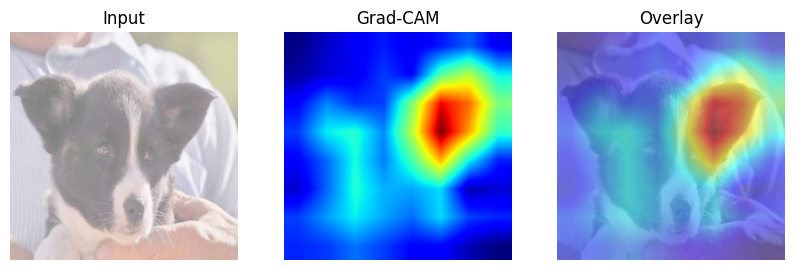

Predicted class: 1, True label: 2


In [166]:
import matplotlib.pyplot as plt

from pytorch_grad_cam import GradCAM                          
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image   

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device).eval()

last_img_tensor, last_label = test_loader.dataset[-1]  # transformed sample (C,H,W)
xb = last_img_tensor.unsqueeze(0).to(device)

target_layers = [model.block3[5]] 

# Pick the class to explain (predicted class here)
with torch.no_grad():
    logits = model(xb)
pred_class = int(logits.argmax(dim=1).item())

cam = GradCAM(model=model, target_layers=target_layers)  # [[1]]

# Compute the CAM (returns a (B,H,W) numpy array in [0,1])
grayscale_cam = cam(input_tensor=xb, targets=[ClassifierOutputTarget(pred_class)])  # [[1]]
cam_map = grayscale_cam[0]  # (H,W)

x_vis = xb[0].detach().cpu()         # (C,H,W)
# De-normalize grayscale: x = x*std + mean = x*0.5 + 0.5
x_vis = (x_vis * 0.5 + 0.5).clamp(0, 1)

# If grayscale (C=1), repeat to 3 channels for visualization
if x_vis.shape[0] == 1:
    x_rgb = x_vis.repeat(3, 1, 1)
else:
    x_rgb = x_vis

rgb_image = np.transpose(x_rgb.numpy(), (1, 2, 0))  # (H,W,3) in [0,1]


overlay = show_cam_on_image(rgb_image, cam_map, use_rgb=True)  # [[1]]

plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.title('Input');    plt.axis('off'); plt.imshow(rgb_image)
plt.subplot(1,3,2); plt.title('Grad-CAM'); plt.axis('off'); plt.imshow(cam_map, cmap='jet')
plt.subplot(1,3,3); plt.title('Overlay');  plt.axis('off'); plt.imshow(overlay)
plt.show()

print(f"Predicted class: {pred_class}, True label: {int(last_label)}")

In [165]:
# pip install lightning
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

import lightning as L
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint, LearningRateMonitor

class BreedClassifier(nn.Module):
    def __init__(self, num_classes = 3):
        super().__init__()

        self.conv1_a = nn.Conv2d(3, 64, kernel_size=5, stride=2, padding=3, bias=False)
        self.conv1_b = nn.Conv2d(64, 64, kernel_size=5, stride=2, padding=3, bias=False)
        self.norm1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU6()
        self.maxpool1 = nn.MaxPool2d(3, stride=2, padding=1)

        self.block1 = nn.Sequential(
            nn.Conv2d(64, 64, 3, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU6(inplace=True),
            nn.Conv2d(64, 64, 3, padding=1, bias=False),
            nn.BatchNorm2d(64),
        )
        self.relu2 = nn.ReLU6()
        self.maxpool2 = nn.MaxPool2d(3, stride=2, padding=1)

        self.expansion1 = nn.Sequential(
            nn.Conv2d(64, 128, 1, bias=False),
            nn.BatchNorm2d(128),
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU6(inplace=True),
            nn.Conv2d(128, 128, 3, padding=1, bias=False),
            nn.BatchNorm2d(128),
        )
        self.relu3 = nn.ReLU6()
        self.maxpool3 = nn.MaxPool2d(3, stride=2, padding=1)

        self.expansion2 = nn.Sequential(
            nn.Conv2d(128, 256, 1, bias=False),
            nn.BatchNorm2d(256),
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(128, 256, 3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU6(inplace=True),
            nn.Conv2d(256, 256, 3, padding=1, bias=False),
            nn.BatchNorm2d(256),
        )
        self.relu4 = nn.ReLU6()

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256, 1024)
        self.drop1 = nn.Dropout(0.2)
        self.relu5 = nn.ReLU6()
        self.fc2 = nn.Linear(1024, 512)
        self.drop2 = nn.Dropout(0.2)
        self.relu6 = nn.ReLU6()
        self.fc3 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.conv1_a(x)
        x = self.conv1_b(x)
        x = self.norm1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        identity = x
        x = self.block1(x)
        x = x + identity
        x = self.relu2(x)
        x = self.maxpool2(x)

        identity = self.expansion1(x)
        x = self.block2(x)
        x = x + identity
        x = self.relu3(x)
        x = self.maxpool3(x)

        identity = self.expansion2(x)
        x = self.block3(x)
        x = x + identity
        x = self.relu4(x)

        x = self.avgpool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu5(x)
        x = self.drop1(x)
        x = self.fc2(x)
        x = self.relu6(x)
        x = self.drop2(x)
        x = self.fc3(x)
        return x

class LitBreedClassifier(L.LightningModule):
    def __init__(self, num_classes=3, lr=1e-3, wd=1e-4):
        super().__init__()
        self.save_hyperparameters()
        self.model = BreedClassifier(num_classes=num_classes)
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        xb, yb = batch
        logits = self(xb)
        loss = self.criterion(logits, yb)
        preds = logits.argmax(dim=1)
        acc = (preds == yb).float().mean()
        self.log("train_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        self.log("train_acc", acc,  prog_bar=True, on_step=False, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        xb, yb = batch
        logits = self(xb)
        loss = self.criterion(logits, yb)
        preds = logits.argmax(dim=1)
        acc = (preds == yb).float().mean()
        # monitor this for ReduceLROnPlateau and EarlyStopping
        self.log("val_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        self.log("val_acc", acc,  prog_bar=True, on_step=False, on_epoch=True)

    def test_step(self, batch, batch_idx):
        xb, yb = batch
        logits = self(xb)
        loss = self.criterion(logits, yb)
        preds = logits.argmax(dim=1)
        acc = (preds == yb).float().mean()
        self.log("test_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        self.log("test_acc", acc,  prog_bar=True, on_step=False, on_epoch=True)

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=self.hparams.lr, weight_decay=self.hparams.wd)
        # ReduceLROnPlateau needs dict return with 'monitor'
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode="min", factor=0.5, patience=2, min_lr=1e-6
        )
        return {
            "optimizer": optimizer,
            "lr_scheduler": {
                "scheduler": scheduler,
                "monitor": "val_loss"  # metric name must match self.log in validation_step
            }
        }

img_size = 224
transform_train = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.2),
    transforms.RandAugment(num_ops=2),
    transforms.ToTensor(),
])
transform_eval = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
])

full_train = datasets.ImageFolder('train/', transform=transform_train)
n = len(full_train)
n_val = max(1, int(0.15 * n))
n_train = n - n_val
train_ds, val_ds = random_split(full_train, [n_train, n_val])

test_ds = datasets.ImageFolder('test/', transform=transform_eval)

num_workers = os.cpu_count()
pin = torch.cuda.is_available()

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True,  num_workers=num_workers, pin_memory=pin)
val_loader   = DataLoader(val_ds,   batch_size=64, shuffle=False, num_workers=num_workers, pin_memory=pin)
test_loader  = DataLoader(test_ds,  batch_size=64, shuffle=False, num_workers=num_workers, pin_memory=pin)

early_stop = EarlyStopping(
    monitor="val_loss", mode="min",
    patience=5, min_delta=0.0, verbose=True
)
ckpt = ModelCheckpoint(
    monitor="val_loss", mode="min",
    save_top_k=1, save_last=True,
    filename="breedcls-{epoch:02d}-{val_loss:.3f}"
)
lrmon = LearningRateMonitor(logging_interval="epoch")

accelerator = "auto"
devices = "auto"  # picks GPU if available

lit_model = LitBreedClassifier(num_classes=3, lr=1e-3, wd=1e-4)

trainer = L.Trainer(
    max_epochs=30,
    accelerator=accelerator,
    devices=devices,
    precision="16-mixed" if torch.cuda.is_available() else "32-true",
    callbacks=[early_stop, ckpt, lrmon],
    log_every_n_steps=10
)

trainer.fit(lit_model, train_dataloaders=train_loader, val_dataloaders=val_loader)

# Load the best checkpoint (optional; EarlyStopping doesn't automatically restore)
best_path = ckpt.best_model_path
if best_path:
    lit_model = LitBreedClassifier.load_from_checkpoint(best_path)

trainer.test(lit_model, dataloaders=test_loader)


Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | BreedClassifier  | 2.1 M  | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
2.1 M     Trainable params
0         Non-trainable params
2.1 M     Total params
8.480     Total estimated model params size (MB)
45        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                                | 0/? [00:00…

Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Metric val_loss improved. New best score: 1.097


Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Metric val_loss improved by 0.247 >= min_delta = 0.0. New best score: 0.850


Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Metric val_loss improved by 0.065 >= min_delta = 0.0. New best score: 0.785


Validation: |                                                                                     | 0/? [00:00…

Metric val_loss improved by 0.013 >= min_delta = 0.0. New best score: 0.772


Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Metric val_loss improved by 0.195 >= min_delta = 0.0. New best score: 0.577


Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Metric val_loss improved by 0.100 >= min_delta = 0.0. New best score: 0.477


Validation: |                                                                                     | 0/? [00:00…

Metric val_loss improved by 0.090 >= min_delta = 0.0. New best score: 0.387


Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Monitored metric val_loss did not improve in the last 5 records. Best score: 0.387. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |                                                                                        | 0/? [00:00…

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9166666865348816     │
│         test_loss         │    0.18441279232501984    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.18441279232501984, 'test_acc': 0.9166666865348816}]

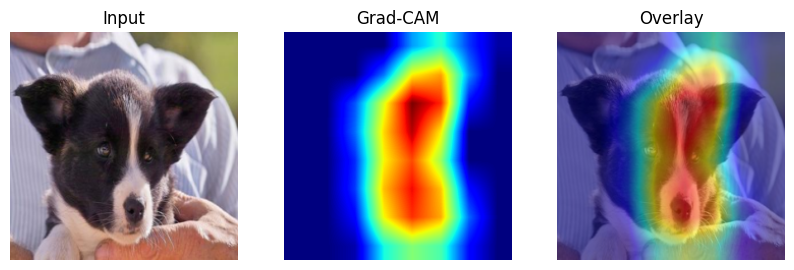

Predicted class: 2, True label: 2


In [191]:
last_img_t, last_label = test_loader.dataset[-1]    # Tensor (C,H,W) in [0,1]
xb = last_img_t.unsqueeze(0).to(device)     
lit_model = lit_model.to(device).eval()

target_layers = [lit_model.model.block3[3]]

img_t, label = test_loader.dataset[-1]     # (C,H,W), in [0,1] with your current transforms
xb = img_t.unsqueeze(0).to(device)         # (1,C,H,W)

with torch.no_grad():
    logits = lit_model(xb)
pred_class = int(logits.argmax(dim=1).item())

cam = GradCAM(model=lit_model.model, target_layers=target_layers)
grayscale_cam = cam(input_tensor=xb, targets=[ClassifierOutputTarget(pred_class)])  # (1,H,W) in [0,1]
cam_map = grayscale_cam[0]

img_rgb = xb[0].detach().cpu().permute(1,2,0).numpy().astype(np.float32)  # no de-norm needed in your current test tf
img_rgb = np.clip(img_rgb, 0.0, 1.0)
overlay = show_cam_on_image(img_rgb, cam_map, use_rgb=True)

plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.title('Input');    plt.axis('off'); plt.imshow(img_rgb)
plt.subplot(1,3,2); plt.title('Grad-CAM'); plt.axis('off'); plt.imshow(cam_map, cmap='jet')
plt.subplot(1,3,3); plt.title('Overlay');  plt.axis('off'); plt.imshow(overlay)
plt.show()

print(f"Predicted class: {pred_class}, True label: {int(label)}")

We got best test accuracy of 91.67%. And in above test image we were able to get correct classification and get the model focus more on areas beside ears, but we can also improve the performance by fine tuning a model, as we will do later in part 2 where we will use a Vision Transformer for same task.

## Heart Beat Sounds Anomaly Detection

In this third personal project in this notebook we will make two headed classifier for the Hear Beat sounds in Kaggle dataset. Goal of the model is to analyze the sounds data from Iphone App and digital stethoscope DigiScope and perform Heart Sound Segmentation by classifying among the devices and Heart Sound Classification by making a classifier for four heart beat types.

While we can use different arhictecture to do it, in this project we decided to create a CNN based solution which is first converting sound data into spectrograms and then using them for model training with two headed outputs.

In [1]:
import torchcodec
import torchaudio
from torchaudio.functional import resample
from torchaudio.transforms import MelSpectrogram, AmplitudeToDB
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import pandas as pd

In [5]:
wav, sr = torchaudio.load('data/set_a/normal__201101070538.wav')
print(sr)

44100


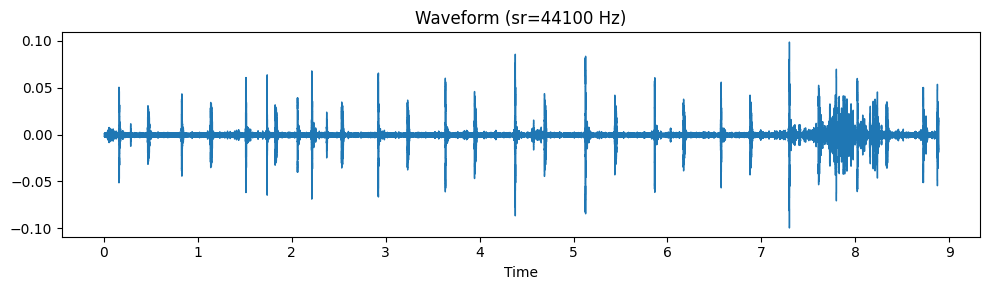

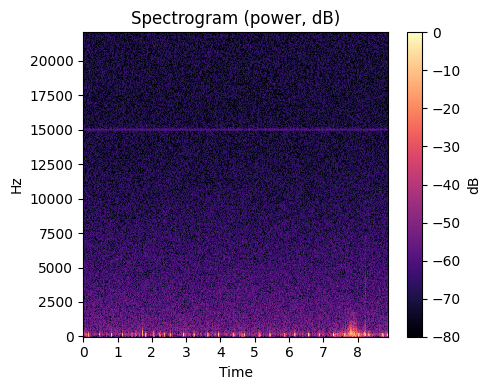

In [14]:
#normal set a
y, sr = librosa.load("data/set_a/normal__201101070538.wav", sr=None, mono=True)

plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)  # waveform plot
plt.title(f"Waveform (sr={sr} Hz)")  # x: time(s), y: amplitude
plt.tight_layout()
plt.show()

#STFT -> power spectrogram -> dB
n_fft = 1024
hop = 256
S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop))**2  # power spectrogram
S_db = librosa.power_to_db(S, ref=np.max)                    # log scale (dB) [[10]]

# visualize spectrogram 
plt.figure(figsize=(5, 4))
librosa.display.specshow(S_db, sr=sr, hop_length=hop, x_axis='time', y_axis='linear')
plt.colorbar(label='dB')
plt.title("Spectrogram (power, dB)")
plt.tight_layout()
plt.show()

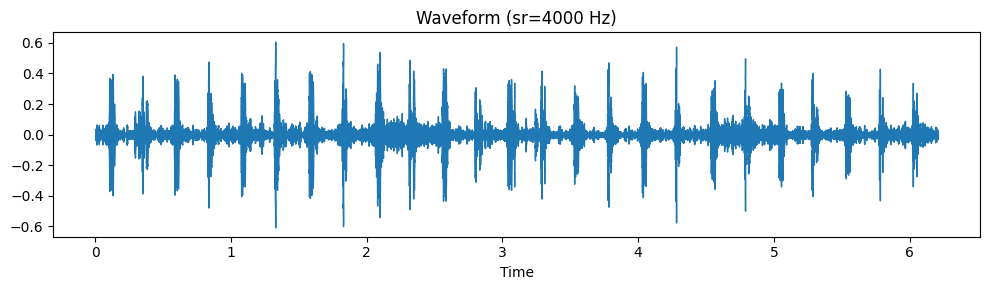

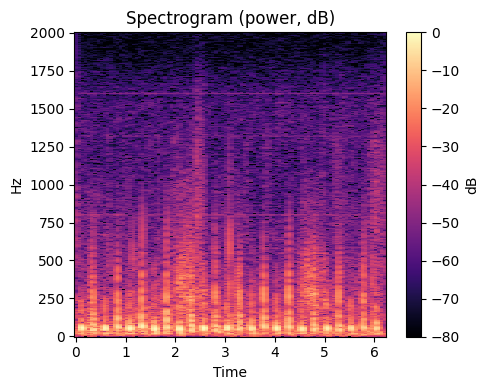

In [10]:
#normal set b
y, sr = librosa.load("data/set_b/normal__103_1305031931979_B.wav", sr=None, mono=True)

plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)  # waveform plot
plt.title(f"Waveform (sr={sr} Hz)")  # x: time(s), y: amplitude
plt.tight_layout()
plt.show()

#STFT -> power spectrogram -> dB
n_fft = 1024
hop = 256
S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop))**2  # power spectrogram
S_db = librosa.power_to_db(S, ref=np.max)                    # log scale (dB) [[10]]

# visualize spectrogram 
plt.figure(figsize=(5, 4))
librosa.display.specshow(S_db, sr=sr, hop_length=hop, x_axis='time', y_axis='linear')
plt.colorbar(label='dB')
plt.title("Spectrogram (power, dB)")
plt.tight_layout()
plt.show()

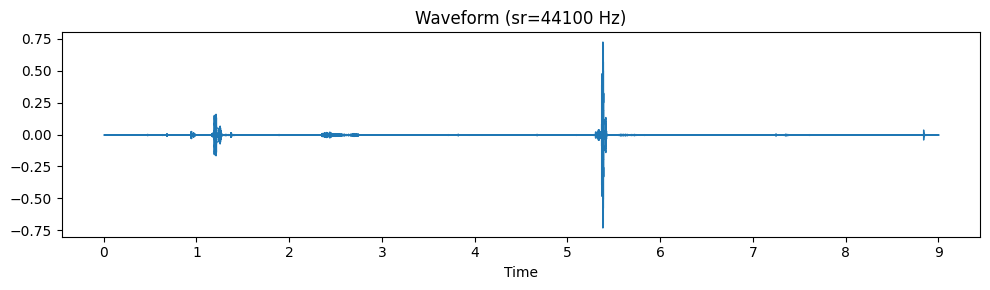

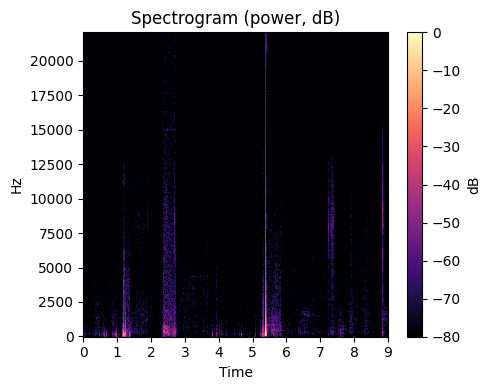

In [11]:
#artifact set a

y, sr = librosa.load("data/set_a/artifact__201012172012.wav", sr=None, mono=True)

plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)  # waveform plot
plt.title(f"Waveform (sr={sr} Hz)")  # x: time(s), y: amplitude
plt.tight_layout()
plt.show()

#STFT -> power spectrogram -> dB
n_fft = 1024
hop = 256
S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop))**2  # power spectrogram
S_db = librosa.power_to_db(S, ref=np.max)                    # log scale (dB) [[10]]

# visualize spectrogram 
plt.figure(figsize=(5, 4))
librosa.display.specshow(S_db, sr=sr, hop_length=hop, x_axis='time', y_axis='linear')
plt.colorbar(label='dB')
plt.title("Spectrogram (power, dB)")
plt.tight_layout()
plt.show()

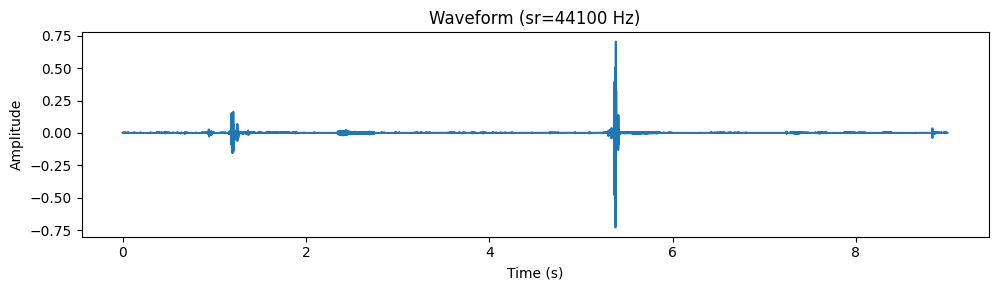

/home/anubh/miniconda3/envs/dl-env/lib/python3.12/site-packages/torchaudio/functional/functional.py:582: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (513) may be set too low.
  warnings.warn(


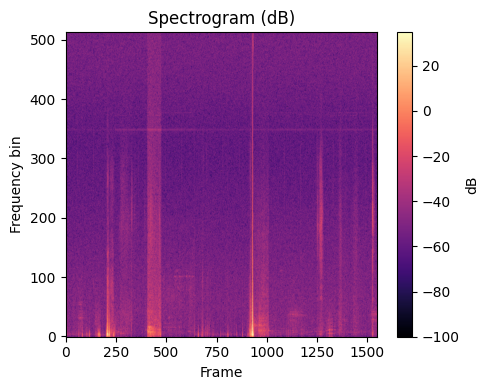

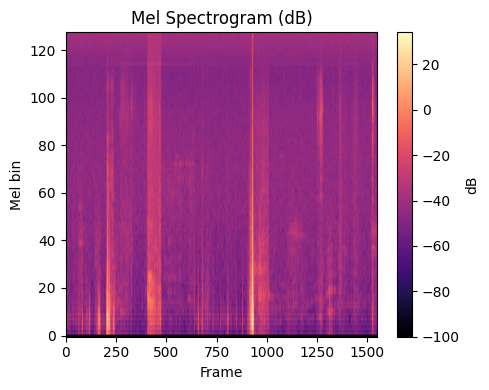

In [12]:
#torch based visuals
wav, sr = torchaudio.load("data/set_a/artifact__201012172012.wav")

if wav.size(0) > 1:
    wav = wav.mean(dim=0, keepdim=True)

# Waveform plot with Matplotlib
t = torch.arange(wav.size(-1)) / sr
plt.figure(figsize=(10, 3))
plt.plot(t.numpy(), wav[0].numpy())
plt.title(f"Waveform (sr={sr} Hz)")
plt.xlabel("Time (s)"); plt.ylabel("Amplitude")
plt.tight_layout(); plt.show()

# 2) Spectrogram and Mel spectrogram (then dB)
spec_tf = torchaudio.transforms.Spectrogram(n_fft=1024, hop_length=256, power=2.0)
mel_tf  = torchaudio.transforms.MelSpectrogram(sample_rate=sr, n_fft=1024, hop_length=256, n_mels=128)
to_db   = torchaudio.transforms.AmplitudeToDB(stype="power")

S = spec_tf(wav)        # (1, freq_bins, time)
S_db = to_db(S)
M = mel_tf(wav)         # (1, mel_bins, time)
M_db = to_db(M)

plt.figure(figsize=(5, 4))
plt.imshow(S_db[0].numpy(), origin='lower', aspect='auto', cmap='magma')
plt.colorbar(label="dB"); plt.title("Spectrogram (dB)")
plt.xlabel("Frame"); plt.ylabel("Frequency bin")
plt.tight_layout(); plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(M_db[0].numpy(), origin='lower', aspect='auto', cmap='magma')
plt.colorbar(label="dB"); plt.title("Mel Spectrogram (dB)")
plt.xlabel("Frame"); plt.ylabel("Mel bin")
plt.tight_layout(); plt.show()


In [6]:
df_phone = pd.read_csv('data/set_a.csv')
df_clinic = pd.read_csv('data/set_b.csv')
print(df_phone.head())
print(df_clinic.head())

  dataset                             fname     label  sublabel
0       a  set_a/artifact__201012172012.wav  artifact       NaN
1       a  set_a/artifact__201105040918.wav  artifact       NaN
2       a  set_a/artifact__201105041959.wav  artifact       NaN
3       a  set_a/artifact__201105051017.wav  artifact       NaN
4       a  set_a/artifact__201105060108.wav  artifact       NaN
  dataset                                       fname       label sublabel
0       b  set_b/extrastole__127_1306764300147_C2.wav  extrastole      NaN
1       b   set_b/extrastole__128_1306344005749_A.wav  extrastole      NaN
2       b   set_b/extrastole__130_1306347376079_D.wav  extrastole      NaN
3       b  set_b/extrastole__134_1306428161797_C1.wav  extrastole      NaN
4       b   set_b/extrastole__138_1306762146980_B.wav  extrastole      NaN


In [7]:
df_concat = pd.concat([df_phone, df_clinic])
df_concat = df_concat.drop(columns = 'sublabel').fillna(-100)
df_concat['fname'] = df_concat['fname'].map(lambda row: 'data/' + row)
df_concat['device'] = df_concat['dataset'].map(lambda row: 0 if row =='a' else 1)
df_concat = df_concat.drop(columns = 'dataset')

df_train = df_concat.loc[df_concat['label'] != -100].reset_index(drop = True)

labels_sorted = sorted(df_train['label'].unique().tolist())
label_dict = {}
for i, label in enumerate(labels_sorted):
    label_dict[label] = i
    
df_train['label'] = df_train['label'].map(label_dict)

df_test = df_concat.loc[df_concat['label'] == -100].reset_index(drop = True)

In [8]:
df_train.head()

fname  label  device
0  data/set_a/artifact__201012172012.wav      0       0
1  data/set_a/artifact__201105040918.wav      0       0
2  data/set_a/artifact__201105041959.wav      0       0
3  data/set_a/artifact__201105051017.wav      0       0
4  data/set_a/artifact__201105060108.wav      0       0

In [9]:
df_test.head()

fname label  device
0  data/set_a/Aunlabelledtest__201012172010.wav  -100       0
1  data/set_a/Aunlabelledtest__201101051105.wav  -100       0
2  data/set_a/Aunlabelledtest__201101061552.wav  -100       0
3  data/set_a/Aunlabelledtest__201101091156.wav  -100       0
4  data/set_a/Aunlabelledtest__201101110659.wav  -100       0

In [10]:
print("Labels:", label_dict)
print("Counts per label:\n", df_train["label"].value_counts())
print("Counts per device:\n", df_train["device"].value_counts())

Labels: {'artifact': 0, 'extrahls': 1, 'extrastole': 2, 'murmur': 3, 'normal': 4}
Counts per label:
 label
4    351
3    129
2     46
0     40
1     19
Name: count, dtype: int64
Counts per device:
 device
1    461
0    124
Name: count, dtype: int64


In [11]:
label_dict

{'artifact': 0, 'extrahls': 1, 'extrastole': 2, 'murmur': 3, 'normal': 4}

In [12]:
df_train['label'] = df_train['label'].map(lambda row: 1 if row ==2 else row) #combining extrahls and stole as they are one category as per model card
df_train['label'] = df_train['label'].map({0:0, 1:1, 3:2, 4:3})
print("Counts per label:\n", df_train["label"].value_counts())

Counts per label:
 label
3    351
2    129
1     65
0     40
Name: count, dtype: int64


In [26]:
TARGET_SR = 16000
N_FFT = 1024
CLIP = 3.0
NUM_SAMPLES = int(TARGET_SR*CLIP)
N_MEL = 128
freq_mask = torchaudio.transforms.FrequencyMasking(freq_mask_param=12)
time_mask = torchaudio.transforms.TimeMasking(time_mask_param=24)

class HeartBeatDataset(Dataset):
    def __init__(self, df, augment = True):
        self.df = df.copy()
        self.augment = augment
        self.melspec = MelSpectrogram(
            sample_rate= TARGET_SR,
            n_fft= N_FFT,
            n_mels= N_MEL, 
            hop_length= 128,
            center= True,
            power = 2.0
        )

        self.to_db = AmplitudeToDB(stype= 'power')

    def __len__(self):
        return len(self.df)

    def load_wav(self, path):
        wav, sr = torchaudio.load(path)

        if sr != TARGET_SR:
            wav = resample(wav, sr, TARGET_SR)

        wav = wav.squeeze(0)

        n = wav.numel()
        if n < NUM_SAMPLES:
            wav = F.pad(wav, (0, NUM_SAMPLES - n))
        else:
            wav = wav[:NUM_SAMPLES]

        return wav

    def logmel_db(self, wav):
        spec = self.melspec(wav.unsqueeze(0))
        S_db = self.to_db(spec)
        if self.augment == True:
            S_db = freq_mask(S_db)
            S_db = time_mask(S_db)
        S_db = (S_db - S_db.mean()) / (S_db.std() + 1e-6)
        S_db = S_db.repeat(3, 1, 1)
        return S_db

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        x_wav = self.load_wav(row['fname'])
        x = self.logmel_db(x_wav)

        y_device = int(row['device'])

        y_label = int(row['label'])

        return x, torch.tensor(y_label).long(), torch.tensor(y_device).long()

train_data = HeartBeatDataset(df = df_train)
test_data = HeartBeatDataset(df = df_test, augment= False)

train_loader = DataLoader(train_data, batch_size= 32, shuffle= True)
test_loader = DataLoader(test_data, batch_size= 32, shuffle = False)

In [14]:
train_loader.dataset[-1][0].shape

torch.Size([3, 128, 376])

In [15]:
test_loader.dataset[-1][0].shape

torch.Size([3, 128, 376])

In [16]:
from torchsummary import summary
import torch.nn.functional as F

In [22]:
class HeartBeatClassifier(nn.Module):
    def __init__(self, num_classes = 4, num_devices = 1):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels= 3, out_channels= 64, kernel_size= 3, padding= 1),
            nn.Conv2d(in_channels= 64, out_channels= 64, kernel_size= 3, padding= 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= 3, stride = 2)
        )

        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels= 64, out_channels= 128, kernel_size= 3, padding= 1),
            nn.Conv2d(in_channels= 128, out_channels= 128, kernel_size= 3, padding= 1),
            nn.BatchNorm2d(128)
        )
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size= 3, stride = 2)

        self.block3 = nn.Sequential(
            nn.Conv2d(in_channels= 128, out_channels= 256, kernel_size= 3, padding= 1),
            nn.Conv2d(in_channels= 256, out_channels= 256, kernel_size= 3, padding= 1),
            nn.BatchNorm2d(256)
        )
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size= 3, stride = 2)

        self.block4 = nn.Sequential(
            nn.Conv2d(in_channels= 256, out_channels= 512, kernel_size= 3, padding= 1),
            nn.Conv2d(in_channels= 512, out_channels= 512, kernel_size= 3, padding= 1),
            nn.BatchNorm2d(512)
        )
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size= 3, stride = 2)

        self.block5 = nn.Sequential(
            nn.Conv2d(in_channels= 512, out_channels= 512, kernel_size= 3, padding= 1),
            nn.Conv2d(in_channels= 512, out_channels= 512, kernel_size= 3, padding= 1),
            nn.BatchNorm2d(512)
        )
        self.relu4 = nn.ReLU()
        
        self.expansion1 = nn.Conv2d(64, 128, kernel_size = 1)
        self.expansion2 = nn.Conv2d(128, 256, kernel_size = 1)
        self.expansion3 = nn.Conv2d(256, 512, kernel_size = 1)

        self.average = nn.AdaptiveAvgPool2d(1)
        self.flatten = nn.Flatten()

        self.head1 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.Dropout(0.1), 
            nn.ReLU6(), 
            nn.Linear(1024, 1024), 
            nn.Dropout(0.1),
            nn.ReLU6(), 
            nn.Linear(1024, num_classes)
        )

        self.head2 = nn.Sequential(
            nn.Linear(512, 512), 
            nn.Dropout(0.1), 
            nn.ReLU6(), 
            nn.Linear(512, 256), 
            nn.Dropout(0.1), 
            nn.ReLU6(),
            nn.Linear(256, num_devices)
        )
        

    def forward(self, inputs):

        x = self.block1(inputs)
        identity = self.expansion1(x)
        x = self.block2(x)
        x = identity + x
        x = self.relu1(x)
        x = self.pool1(x)
        
        identity = self.expansion2(x)
        x = self.block3(x)
        x = identity + x
        x = self.relu2(x)
        x = self.pool2(x)

        identity = self.expansion3(x)
        x = self.block4(x)
        x = identity + x
        x = self.relu3(x)
        x = self.pool3(x)
        
        identity = x
        x = self.block5(x)
        x = identity + x
        x = self.relu4(x)
        
        x = self.average(x)
        x = self.flatten(x)

        y1 = self.head1(x)
        y2 = self.head2(x)

        return y1, y2
device = torch.device('cuda')
model = HeartBeatClassifier(num_classes= 4, num_devices = 2).to(device)
summary(model, input_size= (3,128,376))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 376]           1,792
            Conv2d-2         [-1, 64, 128, 376]          36,928
       BatchNorm2d-3         [-1, 64, 128, 376]             128
              ReLU-4         [-1, 64, 128, 376]               0
         MaxPool2d-5          [-1, 64, 63, 187]               0
            Conv2d-6         [-1, 128, 63, 187]           8,320
            Conv2d-7         [-1, 128, 63, 187]          73,856
            Conv2d-8         [-1, 128, 63, 187]         147,584
       BatchNorm2d-9         [-1, 128, 63, 187]             256
             ReLU-10         [-1, 128, 63, 187]               0
        MaxPool2d-11          [-1, 128, 31, 93]               0
           Conv2d-12          [-1, 256, 31, 93]          33,024
           Conv2d-13          [-1, 256, 31, 93]         295,168
           Conv2d-14          [-1, 256,

In [23]:
optimizer = torch.optim.AdamW(params = model.parameters(), lr = 0.0001, weight_decay= 0.03)
loss_label  = nn.CrossEntropyLoss()
loss_device = nn.CrossEntropyLoss()

model.train()
for epoch in range(40):
    epoch_loss = 0.0
    total = 0
    correct_label = 0
    correct_device = 0

    for xb, ylabel, ydevice in train_loader:
        xb, ylabel, ydevice = xb.to(device), ylabel.to(device), ydevice.to(device)
        bsz = xb.size(0)

        optimizer.zero_grad()
        logits_label, logits_device = model(xb)
        loss = loss_label(logits_label, ylabel) + loss_device(logits_device, ydevice)*0.2
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * bsz
        total += bsz
        correct_label  += (logits_label.argmax(1)  == ylabel).sum().item()
        correct_device += (logits_device.argmax(1) == ydevice).sum().item()

    print(f"Epoch {epoch+1:02d} | loss {epoch_loss/total:.4f} "
          f"| label acc {correct_label/total:.3f} | device acc {correct_device/total:.3f}")

Epoch 01 | loss 1.1187 | label acc 0.579 | device acc 0.915
Epoch 02 | loss 0.9396 | label acc 0.631 | device acc 0.981
Epoch 03 | loss 0.8879 | label acc 0.644 | device acc 0.985
Epoch 04 | loss 0.8330 | label acc 0.701 | device acc 0.979
Epoch 05 | loss 0.7614 | label acc 0.721 | device acc 0.979
Epoch 06 | loss 0.7735 | label acc 0.706 | device acc 0.976
Epoch 07 | loss 0.7307 | label acc 0.721 | device acc 0.990
Epoch 08 | loss 0.7423 | label acc 0.716 | device acc 0.983
Epoch 09 | loss 0.7090 | label acc 0.730 | device acc 0.995
Epoch 10 | loss 0.6551 | label acc 0.762 | device acc 0.983
Epoch 11 | loss 0.6436 | label acc 0.762 | device acc 0.991
Epoch 12 | loss 0.6579 | label acc 0.776 | device acc 0.986
Epoch 13 | loss 0.6621 | label acc 0.750 | device acc 0.993
Epoch 14 | loss 0.7034 | label acc 0.742 | device acc 0.990
Epoch 15 | loss 0.6509 | label acc 0.771 | device acc 0.988
Epoch 16 | loss 0.6289 | label acc 0.778 | device acc 0.983
Epoch 17 | loss 0.6377 | label acc 0.759

In [27]:
model.eval()
with torch.no_grad():
    total = 0
    correct = 0
    pred_label = []
    for xb, _, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        logits_label, logits_device = model(xb)
        pred_dv = logits_device.argmax(1)
        pred_label.append(logits_label.argmax(dim = 1))
        correct += (pred_dv == yb).sum().item()
        total += yb.size(0)
    print(f'Accuracy for device: {correct / total}')

Accuracy for device: 0.9959349593495935


We obtained device test accuracy of 99.6% and for label classification we obtained 80% accuracy. We can improve the perfomance by finetuning a model, and for ViTs we can even use LoRA finetuning for more specific usage of our tasks.

## Fruits Object Detection

In this assignment we will create an object detector based on the detecto library which is using Faster RCNN architecture for object detection.

In [39]:
#%% packages
from detecto import core, utils
from detecto.visualize import show_labeled_image
from torchvision import transforms
import numpy as np


#%% data download
path_images = 'images'
path_train_labels = 'train_labels'
path_test_labels = 'test_labels'

# %% data augmentation
custom_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    utils.normalize_transform()
])

# %% dataset and dataloader
trained_labels = ['apple', 'banana']

train_dataset = core.Dataset(image_folder=path_images, label_data=path_train_labels, transform=custom_transforms)
test_dataset = core.Dataset(image_folder=path_images, label_data=path_test_labels, transform=custom_transforms)

train_loader = core.DataLoader(train_dataset, batch_size=2, shuffle=False)
test_loader = core.DataLoader(test_dataset, batch_size=2, shuffle=False)
# %% initialize model
model = core.Model(trained_labels)
# %% perform the training
losses = model.fit(train_loader, test_dataset, epochs=30, verbose=True)

Epoch 1 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:29<00:00,  2.24it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:04<00:00,  7.09it/s]


Loss: 0.34832801801316876
Epoch 2 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:27<00:00,  2.43it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:03<00:00,  8.99it/s]


Loss: 0.38185006467735066
Epoch 3 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:27<00:00,  2.40it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:03<00:00,  9.01it/s]


Loss: 0.3683197423815727
Epoch 4 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:27<00:00,  2.41it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:03<00:00,  8.93it/s]


Loss: 0.22346697342308128
Epoch 5 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:27<00:00,  2.40it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:03<00:00,  8.85it/s]


Loss: 0.20825719088315964
Epoch 6 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:27<00:00,  2.39it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:03<00:00,  8.94it/s]


Loss: 0.2057580265271313
Epoch 7 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:27<00:00,  2.40it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:03<00:00,  8.87it/s]


Loss: 0.20355995843077407
Epoch 8 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:27<00:00,  2.39it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:03<00:00,  9.23it/s]


Loss: 0.19997064802138245
Epoch 9 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:27<00:00,  2.38it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:03<00:00,  9.18it/s]


Loss: 0.2120532366063665
Epoch 10 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:27<00:00,  2.38it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:03<00:00,  9.52it/s]


Loss: 0.19446319429313436
Epoch 11 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:27<00:00,  2.39it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:03<00:00,  8.85it/s]


Loss: 0.20002601744935794
Epoch 12 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:27<00:00,  2.38it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:03<00:00,  8.83it/s]


Loss: 0.19816670018960447
Epoch 13 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:27<00:00,  2.38it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:03<00:00,  8.80it/s]


Loss: 0.21265014436315088
Epoch 14 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:27<00:00,  2.38it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:03<00:00,  9.06it/s]


Loss: 0.2086909570019035
Epoch 15 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:27<00:00,  2.37it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:03<00:00,  8.78it/s]


Loss: 0.22170835985418627
Epoch 16 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:27<00:00,  2.37it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:03<00:00,  9.04it/s]


Loss: 0.21665679608636043
Epoch 17 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:27<00:00,  2.37it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:03<00:00,  9.01it/s]


Loss: 0.21420298264745405
Epoch 18 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:27<00:00,  2.38it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:03<00:00,  8.77it/s]


Loss: 0.23680762267288039
Epoch 19 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:27<00:00,  2.38it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:03<00:00,  9.05it/s]


Loss: 0.2087141675326754
Epoch 20 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:27<00:00,  2.36it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:03<00:00,  8.73it/s]


Loss: 0.21262839984367876
Epoch 21 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:28<00:00,  2.34it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:04<00:00,  8.24it/s]


Loss: 0.20348607529612148
Epoch 22 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:26<00:00,  2.45it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:02<00:00, 11.37it/s]


Loss: 0.19994149154380841
Epoch 23 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:22<00:00,  2.98it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:02<00:00, 11.73it/s]


Loss: 0.21972107668133342
Epoch 24 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:22<00:00,  2.98it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:02<00:00, 11.67it/s]


Loss: 0.19521226865403793
Epoch 25 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:22<00:00,  2.98it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:02<00:00, 11.96it/s]


Loss: 0.20192643079687567
Epoch 26 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:22<00:00,  2.98it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:02<00:00, 11.97it/s]


Loss: 0.22077624543624766
Epoch 27 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:22<00:00,  2.97it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:02<00:00, 11.59it/s]


Loss: 0.21205704867401542
Epoch 28 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:22<00:00,  2.96it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:02<00:00, 11.58it/s]


Loss: 0.19560889691552696
Epoch 29 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:23<00:00,  2.84it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:02<00:00, 11.52it/s]


Loss: 0.2019019851132351
Epoch 30 of 30
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 66/66 [00:22<00:00,  2.93it/s]


Begin iterating over validation dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 34/34 [00:02<00:00, 11.84it/s]

Loss: 0.20255272287656279


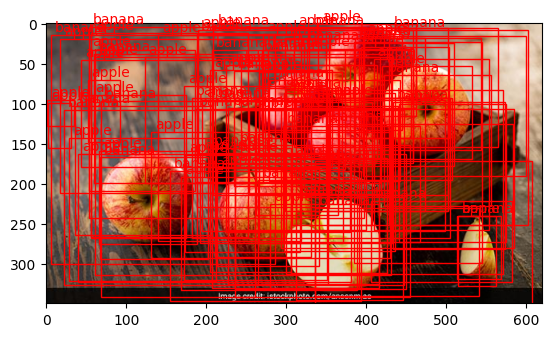

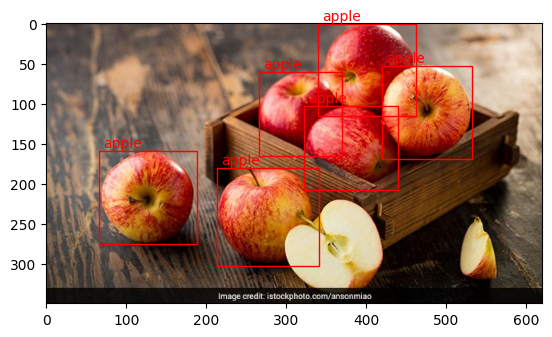

In [55]:
test_image_path = 'images/apple_5.jpg'
test_image = utils.read_image(test_image_path)
pred = model.predict(test_image)
labels, boxes, scores = pred
show_labeled_image(test_image, boxes, labels)

#%% show image with predictions above confidence threshold
conf_threshold = 0.9
filtered_indices = np.where(scores > conf_threshold)
filteres_scores = scores[filtered_indices]
filtered_boxes = boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [labels[i] for i in num_list]
show_labeled_image(test_image, filtered_boxes, filtered_labels)

# %% get predictions
y_test_pred = []
import torch
with torch.no_grad():
    for j, data in enumerate(test_loader):
        image, label = data
        output = model.predict(image)
        y_test_pred.extend(output)
        
        break

Even with Faster RCNN we were able to get decent results in this assignment.

## Face Mask Detector

Fourth personal project in the notebook, here we are making an object detection solution using YoloV8 for Face Mask dataset by using Ultralytics libary.

In [7]:
import os, glob, xml.etree.ElementTree as ET

root = "datasets"
images_root = os.path.join(root, "images")     
annotations_dir = os.path.join("annotations")  #dir for VOC .xml files

labels_root = os.path.join(root, "labels")
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(labels_root, split), exist_ok=True)

classes = ["with_mask", "without_mask", "mask_weared_incorrect"] 

img_to_split = {}
for split in ["train", "val", "test"]:
    for ext in ("*.jpg", "*.jpeg", "*.png"):
        for p in glob.glob(os.path.join(images_root, split, ext)):
            img_to_split[os.path.splitext(os.path.basename(p))[0]] = split

def voc_to_yolo_bbox(img_w, img_h, xmin, ymin, xmax, ymax):
    # Convert VOC (xyxy) to YOLO normalized (cx, cy, w, h)
    x = (xmin + xmax) / 2.0
    y = (ymin + ymax) / 2.0
    w = (xmax - xmin)
    h = (ymax - ymin)
    return x / img_w, y / img_h, w / img_w, h / img_h

xml_files = glob.glob(os.path.join(annotations_dir, "*.xml"))
missing = 0
written = 0

for xml_path in xml_files:
    root_xml = ET.parse(xml_path).getroot()
    filename = root_xml.findtext("filename")  # e.g., maksssksksss0.png
    stem = os.path.splitext(filename)[0]

    # Skip if the image is not in any split
    split = img_to_split.get(stem, None)
    if split is None:
        missing += 1
        continue

    size = root_xml.find("size")
    img_w = int(size.findtext("width"))
    img_h = int(size.findtext("height"))

    lines = []
    for obj in root_xml.findall("object"):
        name = obj.findtext("name")
        cls_id = classes.index(name)
        bnd = obj.find("bndbox")
        xmin = float(bnd.findtext("xmin"))
        ymin = float(bnd.findtext("ymin"))
        xmax = float(bnd.findtext("xmax"))
        ymax = float(bnd.findtext("ymax"))

        cx, cy, bw, bh = voc_to_yolo_bbox(img_w, img_h, xmin, ymin, xmax, ymax)
        lines.append(f"{cls_id} {cx:.6f} {cy:.6f} {bw:.6f} {bh:.6f}")

    out_label = os.path.join(labels_root, split, stem + ".txt")
    with open(out_label, "w") as f:
        f.write("\n".join(lines))
    written += 1

print(f"Converted {written} XMLs. Missing (image not in splits): {missing}")

Converted 853 XMLs. Missing (image not in splits): 0


In [8]:
from ultralytics import YOLO

model = YOLO('yolov9s.pt')
model.train(
    data = "datasets/yolov8_mask.yaml",
    imgsz = 640,
    epochs = 100,
    batch = 16,
    name = "mask_yolov8"
)

Ultralytics 8.3.221 🚀 Python-3.12.11 torch-2.9.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/yolov8_mask.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov9s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=mask_yolov82, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, persp

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x76924bfa2810>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [11]:
model = YOLO("runs/detect/mask_yolov82/weights/best.pt")  
metrics = model.val(
    data = "datasets/yolov8_mask.yaml",
    split = "test",
    imgsz = 640,
    conf = 0.25,
    iou = 0.7,
    plots = True
)

Ultralytics 8.3.221 🚀 Python-3.12.11 torch-2.9.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv9s summary (fused): 197 layers, 7,168,249 parameters, 0 gradients, 26.7 GFLOPs
val: Fast image access ✅ (ping: 1.9±0.2 ms, read: 33.4±14.8 MB/s, size: 428.5 KB)
val: Scanning /mnt/c/Users/anubh/pytorch coursera/075_ObjectDetection_Yolo7/datasets/labels/test... 80 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 80/80 181.1it/s 0.4s0.2s
val: New cache created: /mnt/c/Users/anubh/pytorch coursera/075_ObjectDetection_Yolo7/datasets/labels/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 2.3it/s 2.1s0.6s
                   all         80        375      0.812       0.74      0.813      0.569
             with_mask         72        296       0.89      0.906      0.929      0.698
          without_mask         24         67      0.845      0.731      0.827      0.526
 mask_weared_incorrect         11    

In [12]:
print("mAP50-95:", metrics.box.map)     
print("mAP50:", metrics.box.map50)
print("Per-class AP:", metrics.box.maps)
print("Precision:", metrics.box.mp, "Recall:", metrics.box.mr)

mAP50-95: 0.5692084994354801
mAP50: 0.8126903969907273
Per-class AP: [    0.69786      0.5265     0.48326]
Precision: 0.8117306134296856 Recall: 0.7400857895973346


In [15]:
model.predict(source="datasets/images/test", imgsz=640, conf=0.3, iou = 0.7, save=True)


image 1/80 /mnt/c/Users/anubh/pytorch coursera/075_ObjectDetection_Yolo7/datasets/images/test/maksssksksss7.png: 480x640 3 with_masks, 59.3ms
image 2/80 /mnt/c/Users/anubh/pytorch coursera/075_ObjectDetection_Yolo7/datasets/images/test/maksssksksss723.png: 384x640 7 with_masks, 5 without_masks, 51.5ms
image 3/80 /mnt/c/Users/anubh/pytorch coursera/075_ObjectDetection_Yolo7/datasets/images/test/maksssksksss724.png: 480x640 1 with_mask, 52.1ms
image 4/80 /mnt/c/Users/anubh/pytorch coursera/075_ObjectDetection_Yolo7/datasets/images/test/maksssksksss725.png: 640x512 1 with_mask, 42.9ms
image 5/80 /mnt/c/Users/anubh/pytorch coursera/075_ObjectDetection_Yolo7/datasets/images/test/maksssksksss726.png: 416x640 1 with_mask, 3 without_masks, 37.4ms
image 6/80 /mnt/c/Users/anubh/pytorch coursera/075_ObjectDetection_Yolo7/datasets/images/test/maksssksksss727.png: 640x512 1 with_mask, 39.4ms
image 7/80 /mnt/c/Users/anubh/pytorch coursera/075_ObjectDetection_Yolo7/datasets/images/test/maksssksksss7

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'with_mask', 1: 'without_mask', 2: 'mask_weared_incorrect'}
 obb: None
 orig_img: array([[[102, 101, 103],
         [104, 102, 104],
         [105, 101, 105],
         ...,
         [176, 179, 179],
         [175, 176, 175],
         [174, 175, 173]],
 
        [[102, 101, 105],
         [102, 101, 105],
         [104, 101, 106],
         ...,
         [177, 182, 182],
         [167, 169, 168],
         [168, 169, 167]],
 
        [[ 97,  98, 103],
         [ 97,  97, 102],
         [100,  98, 103],
         ...,
         [176, 183, 187],
         [166, 171, 171],
         [169, 173, 169]],
 
        ...,
 
        [[ 41,  35,  40],
         [ 41,  34,  40],
         [ 39,  33,  39],
         ...,
         [ 53,  72,  95],
         [ 54,  73,  95],
         [ 54,  74,  95]],
 
        [[ 40,  35,  40],
         [ 40,  35,  40],
        

In [42]:
%matplotlib inline

import glob, cv2, matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

files = sorted(glob.glob('runs/detect/predict*/*.jpg'))
slider = widgets.IntSlider(min=0, max=max(0,len(files)-1), step=1, value=0)
out = widgets.Output()

def render(i):
    img = cv2.imread(files[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8,6))
    plt.imshow(img); plt.title(files[i]); plt.axis('off')
    plt.show()

@slider.observe
def _on_change(change):
    if change['name'] == 'value':
        with out:
            out.clear_output(wait=True)
            render(change['new'])

with out:
    render(slider.value)

IntSlider(value=0, max=79)

Output()

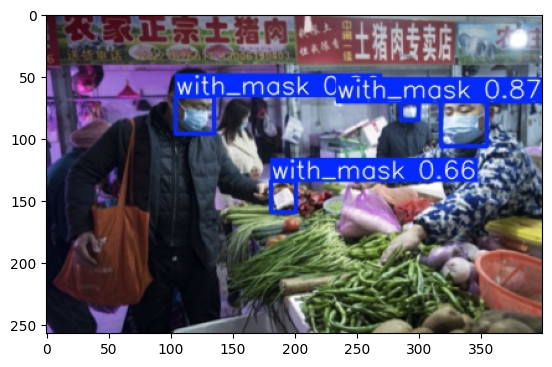

In [240]:
#incase widget is not working, few images
plt.imshow(plt.imread('runs/detect/predict/maksssksksss76.jpg'))
plt.show()

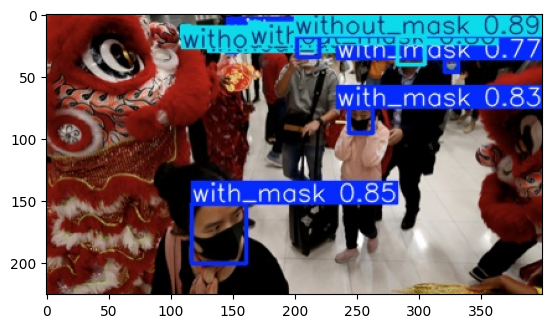

In [255]:
plt.imshow(plt.imread('runs/detect/predict/maksssksksss723.jpg'))
plt.show()

We obtained 81% precision and 74% recall in our test evaluation. We also got mAP50 of 0.81, and while model precision was good across all three categories, we got 70% precision in mask worn incorrectly and much worser recall of 0.58 with same category. Generally model is able to detect mask and no mask/incorrectly worn mask properly, but it is not able to detect differences between not worn and incorrectly worn masks. We can club incorrectly worn mask with no mask category and get a better results. We can also use RetinaNet which focus on focal loss more, leading to better performance in edge cases.

## Style Transfer

In this assignment we will perform style transfer based on the CNN only. We can improve it by making a style gan.

In [8]:
#%% packages
import numpy as np
from PIL import Image
import torch
from torch.optim import Adam
from torchvision import transforms
from torch.nn.functional import mse_loss
from torchvision import models
import matplotlib.pyplot as plt

device = torch.device('cuda')
vgg = models.vgg19(pretrained=True).features.to(device)
# image transformations
preprocess_steps = transforms.Compose([
    transforms.Resize((500, 500)),
    transforms.ToTensor(),
])
content_img = Image.open('Hamburg.jpg').convert('RGB')
content_img = preprocess_steps(content_img)
# transpose from C, H, W to H, W, C
# content_img = content_img.transpose(0, 2)
content_img = torch.unsqueeze(content_img, 0)
print(content_img.shape)

style_img = Image.open('The_Great_Wave_off_Kanagawa.jpg').convert('RGB')
style_img = preprocess_steps(style_img)
# style_img = style_img.transpose(0, 2)
style_img = torch.unsqueeze(style_img, 0)
print(style_img.shape)



/home/anubh/miniconda3/envs/dl-env/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/anubh/miniconda3/envs/dl-env/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([1, 3, 500, 500])
torch.Size([1, 3, 500, 500])


Epoch 10:, Style Loss : 1.2334880011621863e-05, Content Loss : 1.952895998954773
Epoch 20:, Style Loss : 6.605801900150254e-06, Content Loss : 2.2702181339263916
Epoch 30:, Style Loss : 3.930776074412279e-06, Content Loss : 2.281852960586548
Epoch 40:, Style Loss : 2.683736738617881e-06, Content Loss : 2.2072014808654785
Epoch 50:, Style Loss : 2.0945899450453e-06, Content Loss : 2.1109235286712646
Epoch 60:, Style Loss : 1.7807946051107137e-06, Content Loss : 2.016601085662842
Epoch 70:, Style Loss : 1.5846931091800798e-06, Content Loss : 1.9372222423553467
Epoch 80:, Style Loss : 1.4450901062446064e-06, Content Loss : 1.8743387460708618
Epoch 90:, Style Loss : 1.3403756611296558e-06, Content Loss : 1.8222527503967285
Epoch 100:, Style Loss : 1.2571132401717477e-06, Content Loss : 1.7791796922683716
Epoch 110:, Style Loss : 1.1911037063327967e-06, Content Loss : 1.7407504320144653
Epoch 120:, Style Loss : 1.135914885708189e-06, Content Loss : 1.7080092430114746
Epoch 130:, Style Loss 

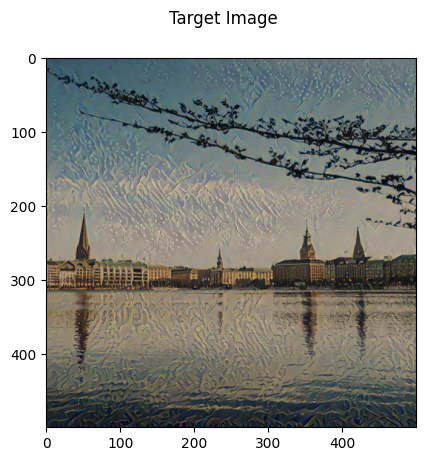

In [9]:
# %% feature extraction 
LOSS_LAYERS = { '0': 'conv1_1', 
                '5': 'conv2_1',  
                '10': 'conv3_1', 
                '19': 'conv4_1', 
                '21': 'conv4_2', 
                '28': 'conv5_1',
                '35' : 'conv5_4',
              }

def extract_features(x, model):
    features = {}   
    for name, layer in model._modules.items():
        x = x.to(device)
        x = layer(x)
        
        if name in LOSS_LAYERS:
            features[LOSS_LAYERS[name]] = x   
            
    return features

content_img_features = extract_features(content_img, vgg)
style_img_features   = extract_features(style_img, vgg)

def calc_gram_matrix(tensor):
    _, C, H, W = tensor.size()
    tensor = tensor.view(C, H * W)    
    gram_matrix = torch.mm(tensor, tensor.t())
    gram_matrix = gram_matrix.div(C * H * W)  # normalization required
    return gram_matrix

style_features_gram_matrix = {layer: calc_gram_matrix(style_img_features[layer]) for layer in 
                                                    style_img_features}

style_features_gram_matrix
# %%
weights = {'conv1_1': 1.0, 'conv2_1': 0.8, 'conv3_1': 0.6,
           'conv4_1': 0.4, 'conv5_1': 0.2, 'conv5_4': 0.3}

target = content_img.clone().requires_grad_(True)

optimizer = Adam([target], lr=0.003)

for i in range(1, 200):
    
    target_features = extract_features(target, vgg)

    content_loss = mse_loss (target_features['conv4_2'], content_img_features['conv4_2'])
    
    style_loss = 0
    for layer in weights:
  
        target_feature = target_features[layer]
        target_gram_matrix = calc_gram_matrix(target_feature)
        style_gram_matrix = style_features_gram_matrix[layer]
        
        layer_loss = mse_loss (target_gram_matrix, style_gram_matrix) * weights[layer]
        

        style_loss += layer_loss  
    
    total_loss = 1000000 * style_loss + content_loss
    
    if i % 10 == 0:
        print (f"Epoch {i}:, Style Loss : {style_loss}, Content Loss : {content_loss}")
    
    optimizer.zero_grad()
    
    total_loss.backward(retain_graph=True)
    
    optimizer.step()

#get target image
mean = (0.485, 0.456, 0.406)  # imagenet mean and std
std = (0.229, 0.224, 0.225)
def tensor_to_image(tensor):

    image = tensor.clone().detach()
    image = image.cpu().numpy().squeeze()

    image = image.transpose(1, 2, 0)

    image *= np.array(std) + np.array(mean)
    image = image.clip(0, 1)

    return image

img = tensor_to_image(target)
fig = plt.figure()
fig.suptitle('Target Image')
plt.imshow(img)


## Pet Classification

Finetuning a DenseNet based model for a Dog/Cat classifer. We obtained 94.74% accuracy in this one.

/home/anubh/miniconda3/envs/dl-env/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/anubh/miniconda3/envs/dl-env/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


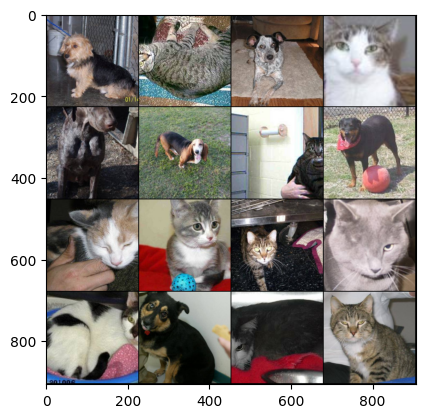

In [65]:
#%% packages
from collections import OrderedDict 
import numpy as np 
import torch 
from torch import optim 
import torch.nn as nn 
import torchvision 
from torchvision import transforms,models 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import accuracy_score
# %% data prep
# original data from https://www.microsoft.com/en-us/download/details.aspx?id=54765

train_dir = 'train' 
test_dir =  'test'

transform = transforms.Compose([transforms.Resize(255), 
    transforms.CenterCrop(224), 
    transforms.ToTensor()]) 
 
dataset = torchvision.datasets.ImageFolder(train_dir, transform= transform) 
train_loader = torch.utils.data.DataLoader(dataset, batch_size=128,shuffle=True) 

dataset = torchvision.datasets.ImageFolder(test_dir, transform= transform) 
test_loader = torch.utils.data.DataLoader(dataset, batch_size=128,shuffle=True) 

# %%
def imshow(image_torch): 
    # flip image channels to RGB
    image_torch = image_torch.numpy().transpose((1, 2, 0)) 
    plt.figure() 
    plt.imshow(image_torch) 
 
X_train, y_train = next(iter(train_loader)) 
 
# Make a grid from batch 
image_grid = torchvision.utils.make_grid(X_train[:16, :, :, :], scale_each= True, nrow=4) 
 
imshow(image_grid) 
# %% download pre-trained network
model = models.densenet121(pretrained = True) 
model 

#%% modify layers
# freeze all layers
for params in model.parameters(): 
    params.requires_grad = False 

for p in model.features.denseblock4.parameters():
    p.requires_grad = True

#%% overwrite classifier of model
model.classifier = nn.Sequential(OrderedDict([ 
    ('fc1',nn.Linear(1024,512)),
    ('fc2',nn.Linear(512,2)) 
])) 

In [68]:
# %% train the model
opt = optim.AdamW([
    {"params": model.features.denseblock4.parameters(), "lr": 0.0005},
    {"params": model.classifier.parameters(), "lr": 0.001},
], weight_decay=0.01)
 
loss_function = nn.CrossEntropyLoss()
train_losses=[] 
 
model.train() 
NUM_EPOCHS = 10
for epoch in range(NUM_EPOCHS): 
    train_loss= 0 
    test_loss= 0 
    for bat,(img,label) in enumerate(train_loader): 
        
        # zero the gradients
        opt.zero_grad() 

        # forward pass
        output = model(img) 

        # calc losses
        loss = loss_function(output.squeeze(),label.long()) 

        # propagate losses
        loss.backward() 

        # update weights
        opt.step() 

        # update current train loss
        train_loss += loss.item() 
 
    
    train_losses.append(train_loss) 
    print(f"epoch: {epoch}, train_loss: {train_loss}") 

epoch: 0, train_loss: 3.032361686229706
epoch: 1, train_loss: 0.30773840844631195
epoch: 2, train_loss: 1.0287186801433563
epoch: 3, train_loss: 0.09026242792606354
epoch: 4, train_loss: 0.020018933340907097
epoch: 5, train_loss: 0.04671946167945862
epoch: 6, train_loss: 0.19584350939840078
epoch: 7, train_loss: 0.026414200197905302
epoch: 8, train_loss: 0.0062650954350829124
epoch: 9, train_loss: 0.002186962519772351
epoch: 10, train_loss: 0.0018909273785538971
epoch: 11, train_loss: 0.0006456671690102667
epoch: 12, train_loss: 0.0005510256451088935
epoch: 13, train_loss: 0.00026990892365574837
epoch: 14, train_loss: 0.0012392306671245024
epoch: 15, train_loss: 0.0006078856094973162
epoch: 16, train_loss: 0.0004140311066294089
epoch: 17, train_loss: 0.00017754772125044838
epoch: 18, train_loss: 0.0001499466088716872
epoch: 19, train_loss: 0.00011945291407755576


Accuracy Score: 94.74 %


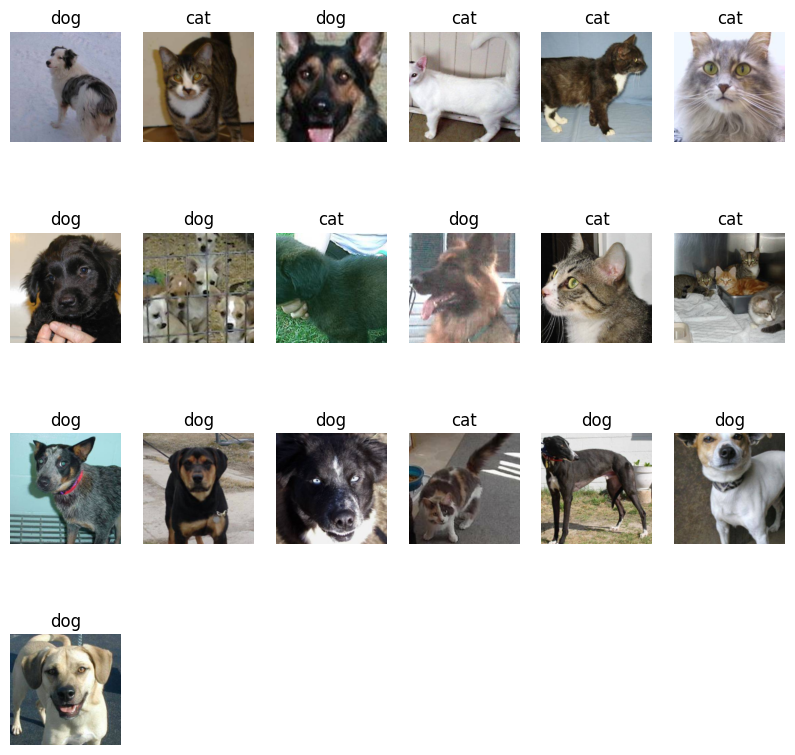

In [81]:
fig = plt.figure(figsize=(10, 10)) 
class_labels = {0:'cat', 1:'dog'} 
with torch.no_grad():
    model.eval()
    for xb, yb in test_loader:
        X_test = xb
        y_test = yb
        logits_yb = model(xb) 
        y_pred = logits_yb.argmax(dim = 1)

# create subplots
y_pred = y_pred.detach().numpy()
for num, sample in enumerate(X_test): 
    plt.subplot(4,6,num+1) 
    plt.title(class_labels[y_pred[num]]) 
    plt.axis('off') 
    sample = sample.cpu().numpy() 
    plt.imshow(np.transpose(sample, (1,2,0))) 

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {np.round(acc * 100, 2)} %")

## Flight Passengers Modeling

LSTM based time series modeling.

Device: cuda
Total points: 144


<Axes: ylabel='passengers'>

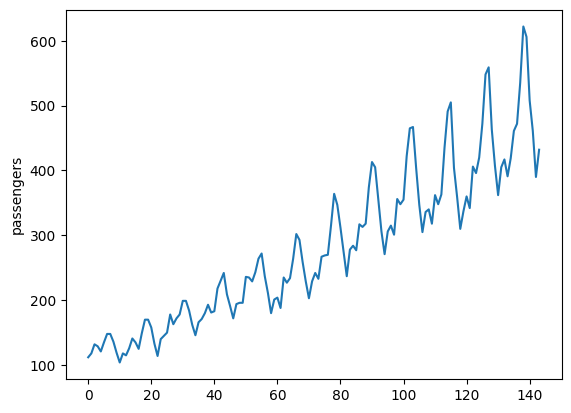

In [226]:
# %% Imports and setup
import os, random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# %% Load flights data
import seaborn as sns
data = sns.load_dataset("flights")
series = data.passengers.values.astype(np.float32)  # shape (144,)
n = len(series)
print("Total points:", n)
sns.lineplot(data.passengers)



In [220]:
# we also created bidirectional LSTM with attention but it didnt work well with low size of data
# class FlightModel(nn.Module):
#     def __init__(self, input_features = 1):
#         super().__init__()
#         self.n0 = nn.Conv1d(input_features, 32, kernel_size= 3, dilation=2, padding= 2)
#         self.n1 = nn.LSTM(input_size = 32, hidden_size = 64, num_layers = 2, batch_first = True, bidirectional = True, dropout = 0.1) 
#         self.attn = nn.MultiheadAttention(embed_dim= 128, num_heads= 8, dropout= 0.1, batch_first= True)
#         self.att_norm = nn.LayerNorm(128)
        
#         self.pool_query = nn.Parameter(torch.randn(1, 1, 128))
#         self.pool_attn  = nn.MultiheadAttention(embed_dim=128, num_heads=8,
#                                                 dropout=0.1, batch_first=True)
#         self.flatten = nn.Flatten()

#         self.head = nn.Sequential(
#             nn.Linear(in_features = 128, out_features= 1024),
#             nn.ReLU(),
#             nn.Dropout(0.1),
#             nn.Linear(in_features = 1024, out_features= 512),
#             nn.ReLU(),
#             nn.Dropout(0.1),
#             nn.Linear(in_features = 512, out_features= 1),
#         )

    
#     def forward(self, inputs):
#         x = inputs.transpose(1,2)
#         x = self.n0(x)
#         x = x.transpose(1,2)
#         x, _ = self.n1(x)
#         y = x
#         x, _ = self.attn(x, x, x)
#         x = self.att_norm(x + y)

#         B = x.size(0)
#         y = self.pool_query.expand(B, -1, -1)

#         x, _ = self.pool_attn(y, x, x, average_attn_weights = False)
#         x = self.flatten(x)

#         x = self.head(x)
#         return x

# from torchinfo import summary

# model = FlightModel().to(device)


Number of Entries: 144
X_train shape: (122, 10, 1)
y_train shape: (122, 1)
X_test shape: (12, 10, 1)
y_test shape: (12, 1)
Epoch: 0, Loss: 0.006889080163091421
Epoch: 10, Loss: 0.020790724083781242
Epoch: 20, Loss: 0.012910285964608192
Epoch: 30, Loss: 0.005519337952136993
Epoch: 40, Loss: 0.0024151320103555918
Epoch: 50, Loss: 0.0014725716318935156
Epoch: 60, Loss: 0.0003993110149167478
Epoch: 70, Loss: 0.0003442694724071771
Epoch: 80, Loss: 0.00028771499637514353
Epoch: 90, Loss: 0.0005544385639950633
Epoch: 100, Loss: 0.0005340390489436686
Epoch: 110, Loss: 0.00043865805491805077
Epoch: 120, Loss: 0.0005672514089383185
Epoch: 130, Loss: 0.0007067845435813069
Epoch: 140, Loss: 0.0003765692235901952
Epoch: 150, Loss: 6.708811497446732e-07
Epoch: 160, Loss: 2.705958831938915e-05
Epoch: 170, Loss: 0.0009550466784276068
Epoch: 180, Loss: 9.131422848440707e-05
Epoch: 190, Loss: 0.00014721644402015954


<Axes: ylabel='None'>

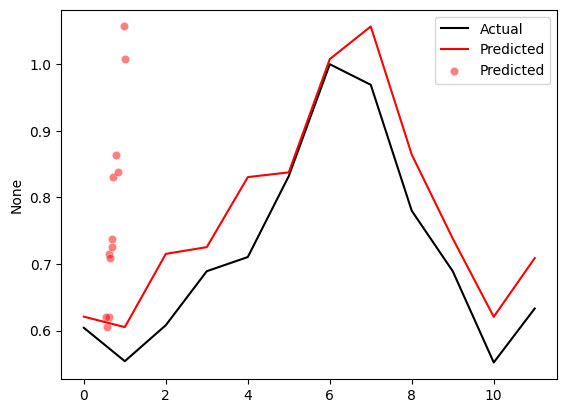

In [234]:
#%% Packages
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

# %% Data Import
data = sns.load_dataset("flights")
print(f'Number of Entries: {len(data)}')
data.head()

# %%
# %%
# Convert passenter data to float32 for PyTorch
num_points = len(data)
Xy = data.passengers.values.astype(np.float32)

#%% scale the data
scaler = MinMaxScaler()

Xy_scaled = scaler.fit_transform(Xy.reshape(-1, 1))


# %% Data Restructuring
X_restruct = [] 
y_restruct = [] 

for i in range(num_points-10):
     list1 = []
     for j in range(i,i+10):
         list1.append(Xy_scaled[j])
     X_restruct.append(list1)
     y_restruct.append(Xy_scaled[j+1])
X_restruct = np.array(X_restruct)
y_restruct = np.array(y_restruct)

#%% train/test split
last_n_months = 12
clip_point = len(X_restruct) - last_n_months
X_train = X_restruct[:clip_point]
X_test = X_restruct[clip_point:]
y_train = y_restruct[:clip_point]
y_test = y_restruct[clip_point:]

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


# %%
class FlightDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Dataloader
train_loader = DataLoader(FlightDataset(X_train, y_train), batch_size=2)
test_loader = DataLoader(FlightDataset(X_test, y_test), batch_size=len(y_test))


# %%
class FlightModel(nn.Module):
    def __init__(self, input_size=1, output_size=1):
        super(FlightModel, self).__init__()
        self.hidden_size = 50
        self.lstm = nn.LSTM(input_size, hidden_size=self.hidden_size, num_layers=1, batch_first=True)
        self.fc1 = nn.Linear(in_features=self.hidden_size, out_features=output_size)
    
    def forward(self, x):
        output, _ = self.lstm(x)    
        output = output[:, -1, :]
        output = self.fc1(torch.relu(output))
        return output

# %% Model, Loss and Optimizer
model = FlightModel()

loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())
NUM_EPOCHS = 200

#%% Train
for epoch in range(NUM_EPOCHS):
    for j, data in enumerate(train_loader):
        X, y = data
       
        optimizer.zero_grad()
        y_pred = model(X)
        loss = loss_fun(y_pred, y)
        loss.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.data}")


# %% Create Predictions
test_set = FlightDataset(X_test, y_test)
X_test_torch, y_test_torch = next(iter(test_loader))
with torch.no_grad():
    y_pred = model(X_test_torch)
y_act = y_test_torch.numpy().squeeze()
x_act = range(y_act.shape[0])
sns.lineplot(x=x_act, y=y_act, label = 'Actual',color='black')
sns.lineplot(x=x_act, y=y_pred.squeeze(), label = 'Predicted',color='red')

# %% correlation plot
sns.scatterplot(x=y_act, y=y_pred.squeeze(), label = 'Predicted',color='red', alpha=0.5)

# %%